In [14]:
import csv
import matplotlib.pyplot as plt
import os
import math
import numpy as np

def median_perc(data) : 
    median = np.zeros(data.shape[1]) 
    perc_25 = np.zeros(data.shape[1]) 
    perc_75 = np.zeros(data.shape[1]) 
    for i in range(0, len(median)): 
        median[i] = np.median(data[:, i]) 
        perc_25[i] = np.percentile(data[:, i], 25) 
        perc_75[i] = np.percentile(data[:, i], 75) 
    return median, perc_75, perc_25   

def load_fitness(filename) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        fitnesses = []
        for row in csv_data :
            fitnesses.append(float(row[2]))
    return fitnesses

def best_fit(fitnesses_vec,from_i) :
    best_fits = []
    for fits in fitnesses_vec :
        best_fits.append(max(fits[from_i:]))
    return best_fits

def load_eval_time(filename) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        durations = []
        eval_nb = []
        for row in csv_data :
            durations.append(float(row[1])*1e-9)
            eval_nb.append(int(row[0]))
    return eval_nb, durations

def load_obs(filename) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        x = []
        y = []
        for row in csv_data :
            x.append(float(row[32]))
            y.append(float(row[33]))
    return x, y


def load_samples(filename) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        samples = []
        for row in csv_data :
            s = []
            for i in range(6,len(row)-1) :
                s.append(float(row[i]))
            samples.append(s)
    return samples

def compute_reward(final_pos,target) :
    return 1 - math.sqrt((final_pos[0] - target[0])**2 + (final_pos[1] - target[1])**2)/math.sqrt(2**3)

def rewards(positions,target) :
    r = []
    for pos in positions :
        r.append(compute_reward(pos,target))
    return r

def load_fit_from_folder(foldername,target) :
    rew_list = []
    for folder in os.listdir(foldername) :
        if(not os.path.isdir(foldername + folder)) :
            continue
        print(folder)
        x,y = load_obs(foldername + folder + "/bo_data.csv")
        r = rewards(zip(x,y),target)
        rew_list.append(r)
    data = np.zeros((len(rew_list),len(rew_list[0])))
    for i in range(len(rew_list)) :
        data[i,:] = rew_list[i]
    median, perc_75, perc_25 = median_perc(data)
    return median, perc_75, perc_25

def load_te_from_folder(foldername,target) :
    tes = []
    for folder in os.listdir(foldername) :
        if(not os.path.isdir(foldername + folder)) :
            continue
        print(folder)
        x,y = load_obs(foldername + folder + "/bo_data.csv")
        r = rewards(zip(x,y),target)
        r = r[50:]
        nbeval, eval_time = load_eval_time(foldername + folder + "/eval_durations.csv")
        print(len(eval_time),len(r))
        te = [(r[i] - r[i-1])/eval_time[i-1] for i in range(1,len(r))]
        tes.append(te)
    data = np.zeros((len(tes),len(tes[0])))
    for i in range(len(tes)) :
        data[i,:] = tes[i]
    median, perc_75, perc_25 = median_perc(data)
    return median, perc_75, perc_25

In [13]:
list_dir = ["/home/le_goff/are-logs/are_mfbo2_ei_001/", \
            "/home/le_goff/are-logs/are_mfbo2_ei_01/", \
            "/home/le_goff/are-logs/are_mfbo2_ei_1/", \
           "/home/le_goff/are-logs/are_mfbo2_ei_10/", \
            "/home/le_goff/are-logs/are_mfbo2_ei_100/"]
list_label = ["ei 001","ei 01","ei 1", "ei 10", "ei 100"]
best_fits = []
for dire in list_dir :
    fitnesses = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "model") :
            continue
        x, y = load_final_pos(dire + folder + "/final_pos.csv")
        fitnesses.append(rewards(zip(x,y)))
    print(len(fitnesses),len(fitnesses[0]))
    best_fits.append(best_fit(fitnesses))
plt.figure(figsize=(10,5))
plt.boxplot(best_fits,labels=list_label)
plt.ylabel("best fitness")
plt.xlabel("acquisition fct")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/le_goff/are-logs/are_mfbo2_ei_001/'

model_free_bayes_opt_217_1_17-27-42-2217


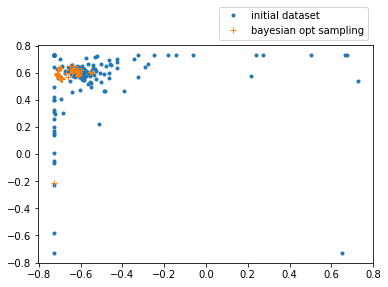

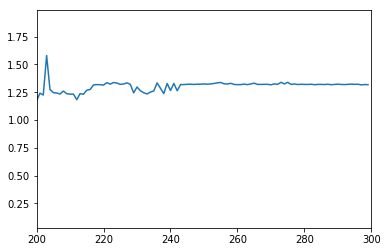

model_free_bayes_opt_217_1_17-27-40-279


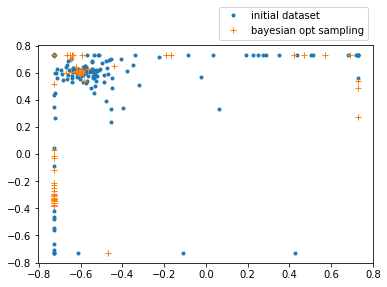

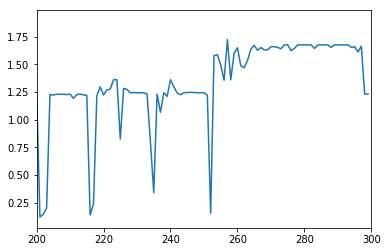

model_free_bayes_opt_217_1_17-27-44-4274


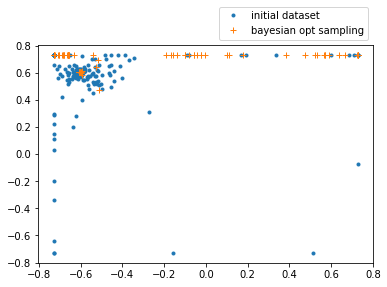

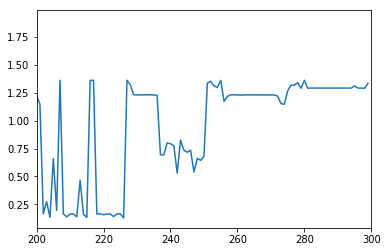

model_free_bayes_opt_217_1_17-27-44-4281


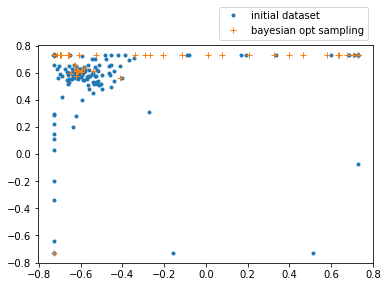

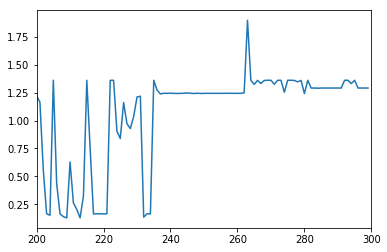

model_free_bayes_opt_217_1_17-27-42-2223


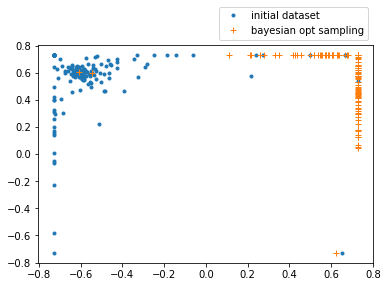

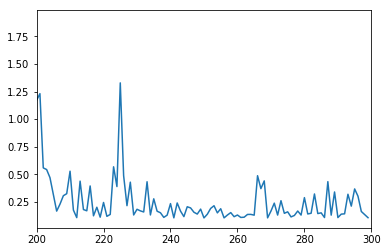

model_free_bayes_opt_217_1_17-27-42-2228


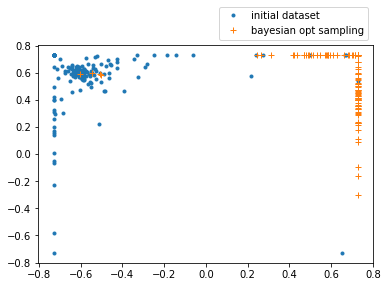

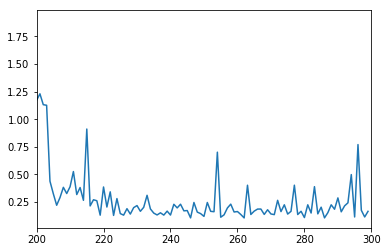

model_free_bayes_opt_217_1_17-27-42-2219


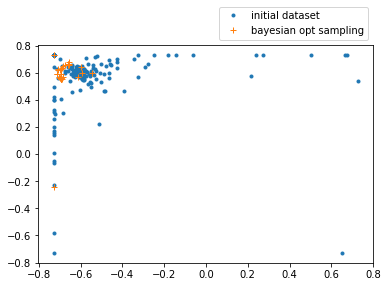

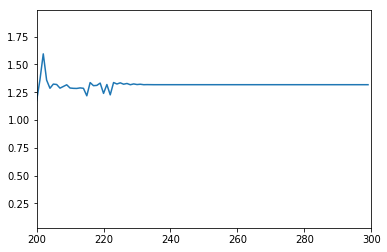

model_free_bayes_opt_217_1_17-27-42-2225


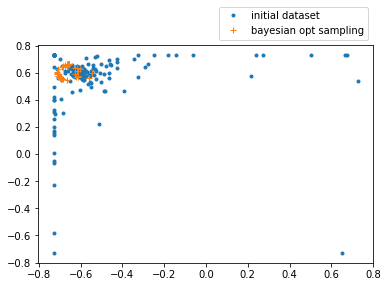

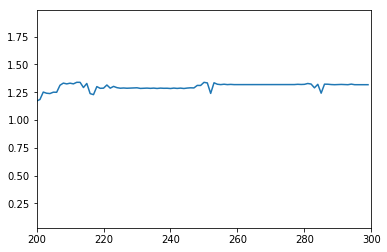

In [7]:
are_mfbo2_arena_ei_001 = "/home/le_goff/are-logs/are_mfbo2_ei_001/"
for folder in os.listdir(are_mfbo2_arena_ei_001) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_arena_ei_001 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    #     ax2.set_ylim(-0.75,0.75)
    #     ax2.set_xlim(-0.75,0.75)
    plt.plot(x[:200],y[:200],'.',label="initial dataset")
    plt.plot(x[200:],y[200:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([200,300])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_217_1_17-26-3-3369


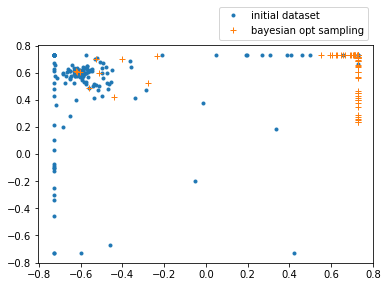

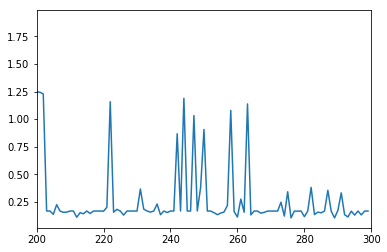

model_free_bayes_opt_217_1_17-26-7-7193


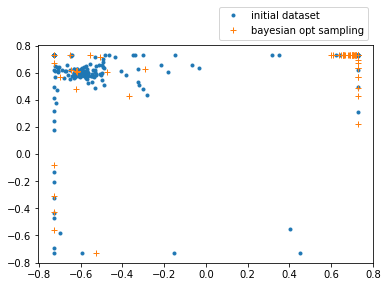

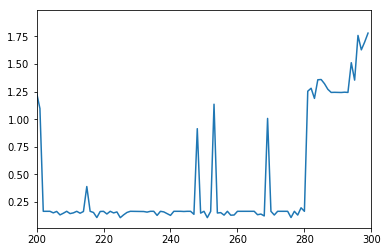

model_free_bayes_opt_217_1_17-26-3-3304


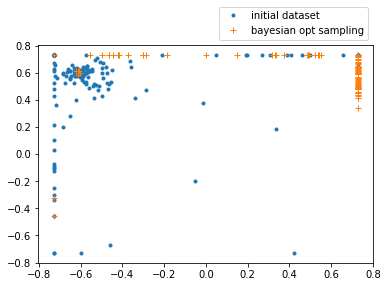

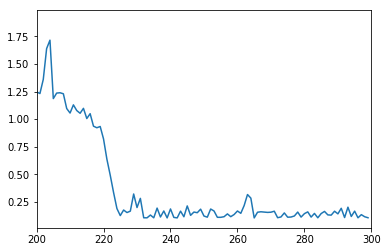

model_free_bayes_opt_217_1_17-26-5-5182


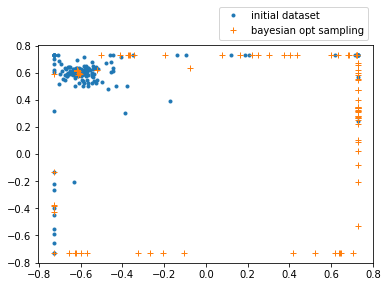

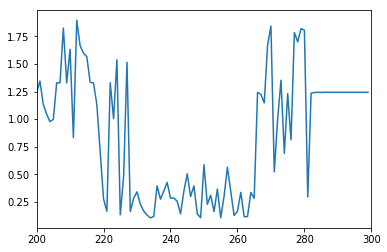

model_free_bayes_opt_217_1_17-26-5-5162


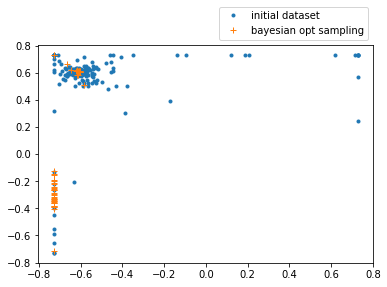

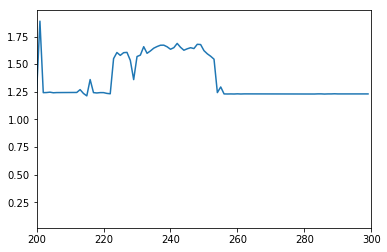

model_free_bayes_opt_217_1_17-26-3-3368


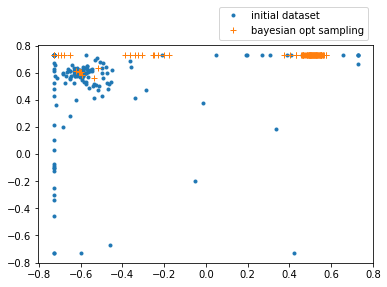

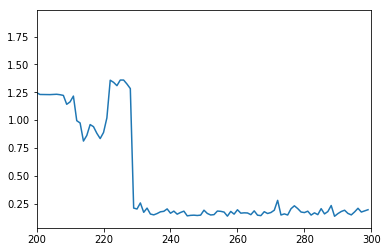

model_free_bayes_opt_217_1_17-26-5-5179


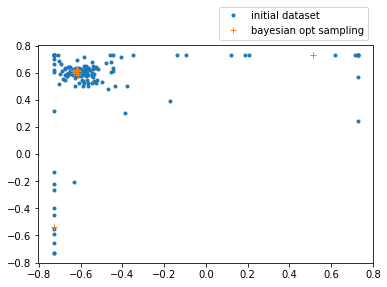

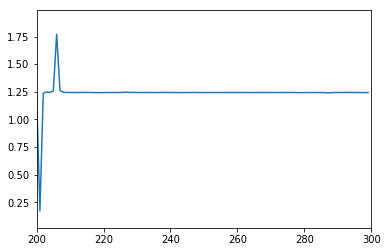

model_free_bayes_opt_217_1_17-26-5-5183


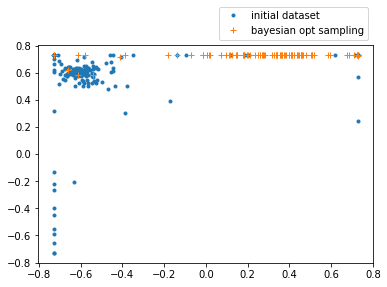

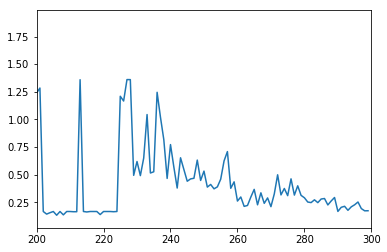

model_free_bayes_opt_217_1_17-26-5-5163


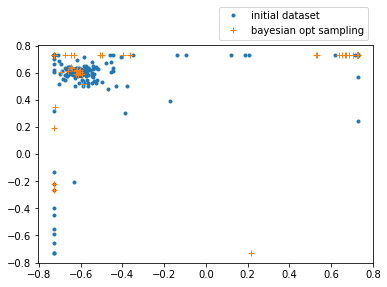

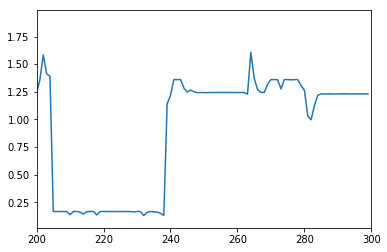

model_free_bayes_opt_217_1_17-26-5-5170


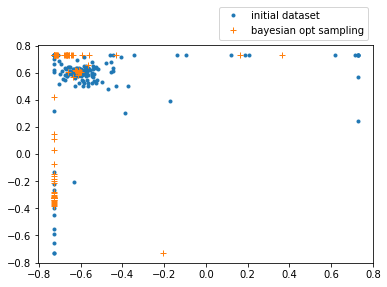

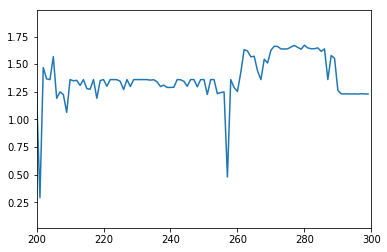

model_free_bayes_opt_217_1_17-26-5-5169


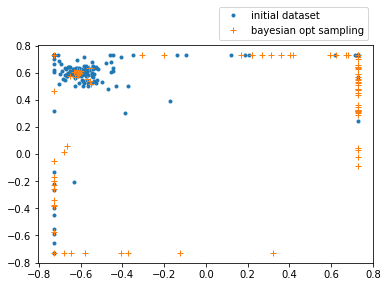

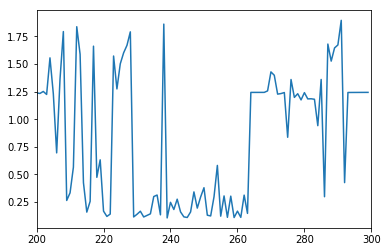

In [8]:
are_mfbo2_arena_ei_01 = "/home/le_goff/are-logs/are_mfbo2_ei_01/"
for folder in os.listdir(are_mfbo2_arena_ei_01) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_arena_ei_01 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    #     ax2.set_ylim(-0.75,0.75)
    #     ax2.set_xlim(-0.75,0.75)
    plt.plot(x[:200],y[:200],'.',label="initial dataset")
    plt.plot(x[200:],y[200:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([200,300])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_217_1_16-23-19-9672


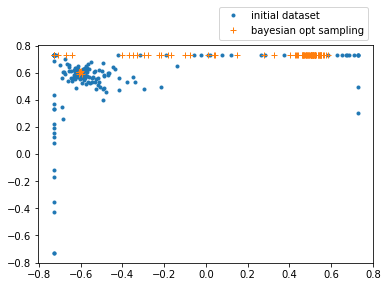

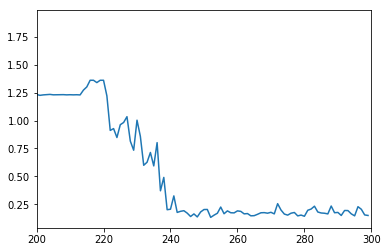

model_free_bayes_opt_217_1_16-23-19-9608


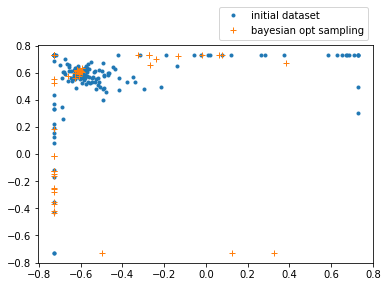

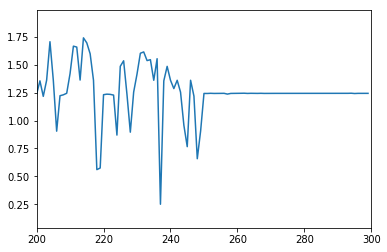

model_free_bayes_opt_217_1_16-23-21-1631


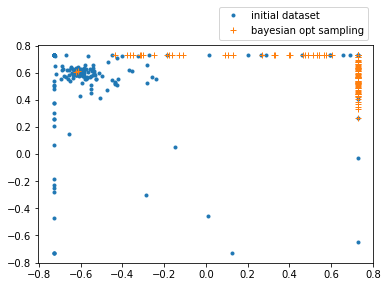

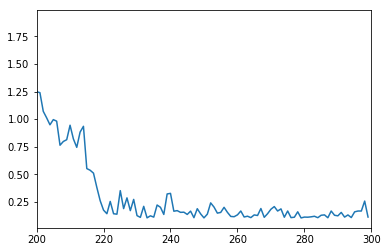

model_free_bayes_opt_217_1_16-23-23-3630


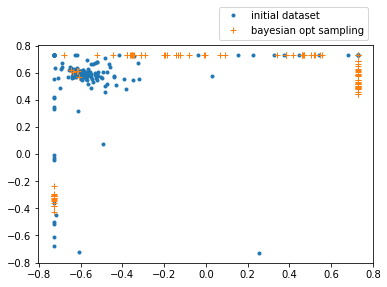

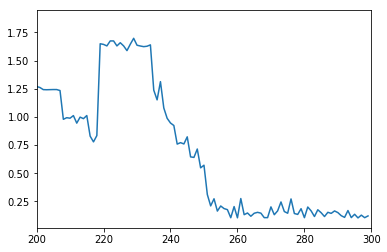

model_free_bayes_opt_217_1_16-23-21-1633


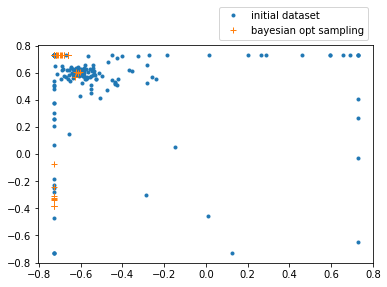

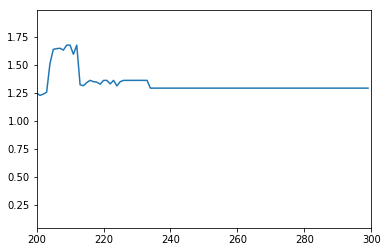

model_free_bayes_opt_217_1_16-23-21-1627


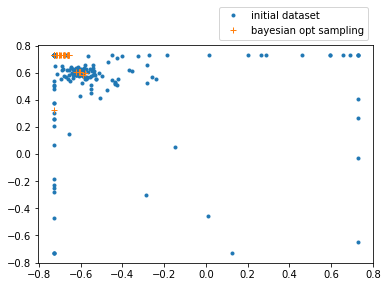

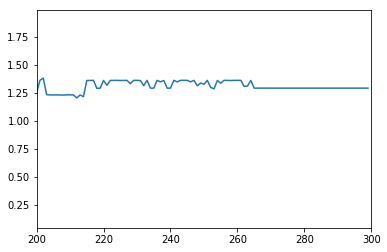

model_free_bayes_opt_217_1_16-23-23-3638


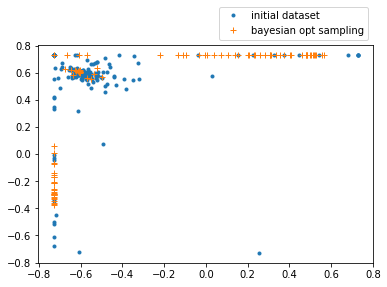

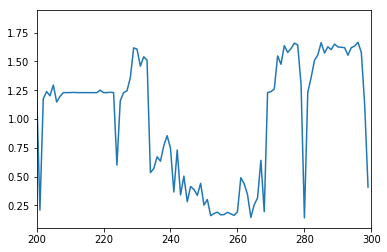

model_free_bayes_opt_217_1_16-23-19-9611


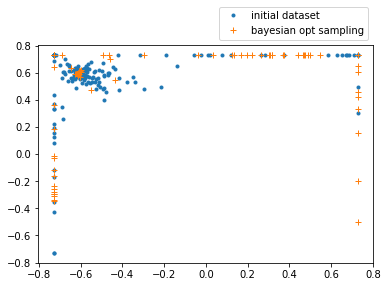

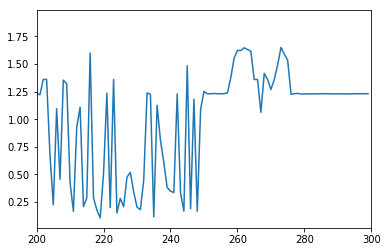

model_free_bayes_opt_217_1_16-23-19-9607


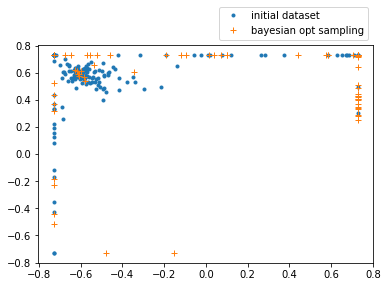

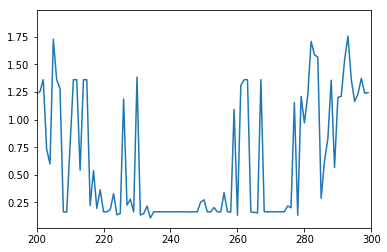

model_free_bayes_opt_217_1_16-23-19-9671


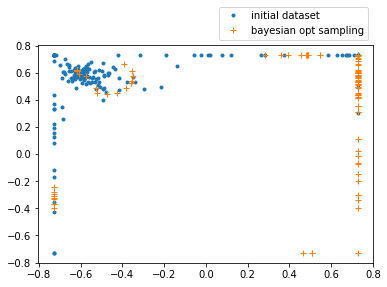

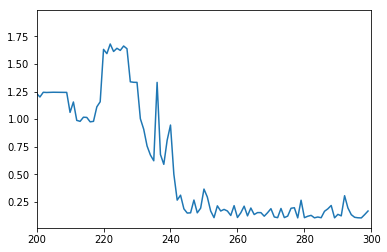

model_free_bayes_opt_217_1_16-23-21-1632


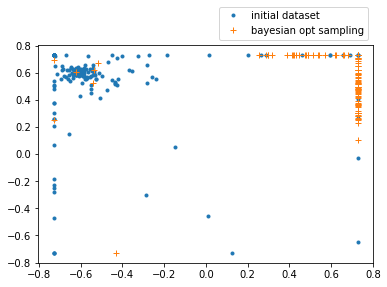

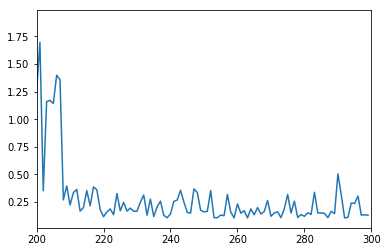

model_free_bayes_opt_217_1_16-23-21-1612


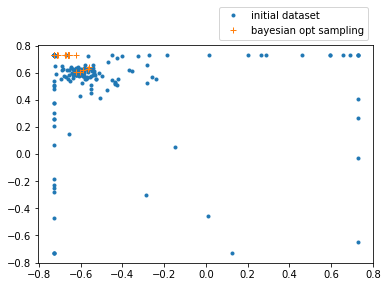

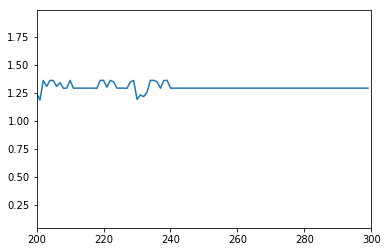

In [9]:
are_mfbo2_arena_ei_1 = "/home/le_goff/are-logs/are_mfbo2_ei_1/"
for folder in os.listdir(are_mfbo2_arena_ei_1) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_arena_ei_1 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    #     ax2.set_ylim(-0.75,0.75)
    #     ax2.set_xlim(-0.75,0.75)
    plt.plot(x[:200],y[:200],'.',label="initial dataset")
    plt.plot(x[200:],y[200:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([200,300])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_217_1_17-24-27-7469


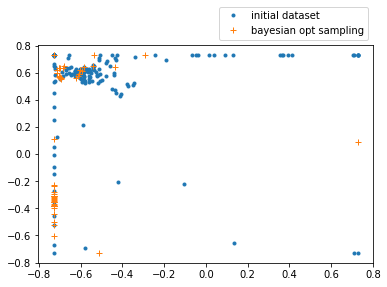

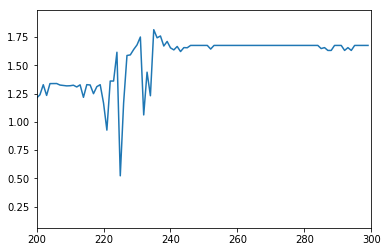

model_free_bayes_opt_217_1_17-24-29-9503


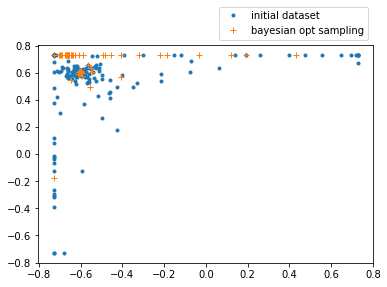

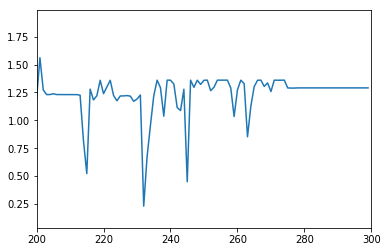

model_free_bayes_opt_217_1_17-24-25-5492


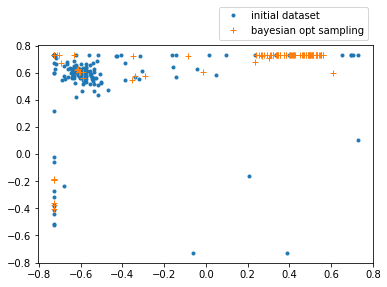

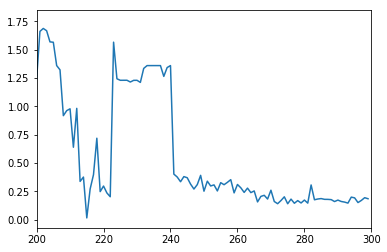

model_free_bayes_opt_217_1_17-24-25-5483


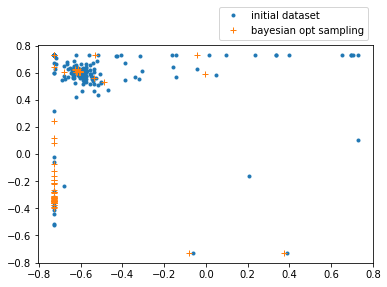

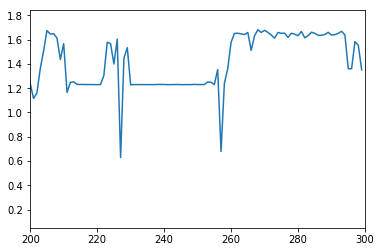

model_free_bayes_opt_217_1_17-24-27-7482


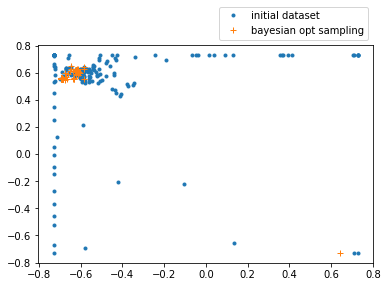

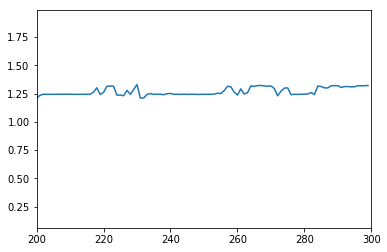

model_free_bayes_opt_217_1_17-24-25-5491


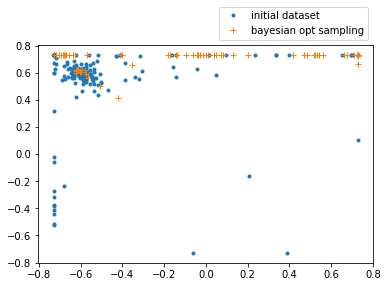

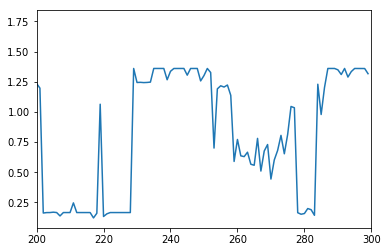

model_free_bayes_opt_217_1_17-24-25-5488


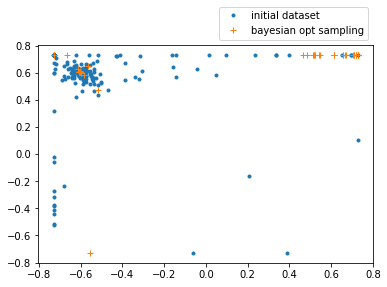

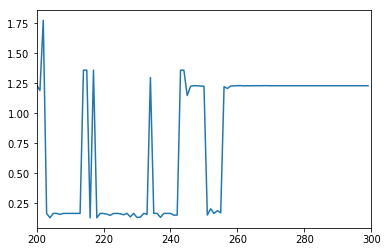

model_free_bayes_opt_217_1_17-24-25-5529


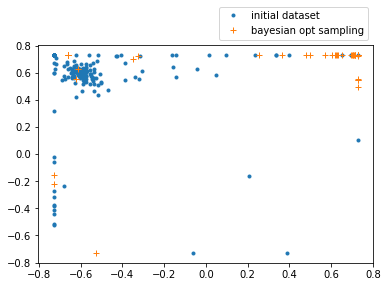

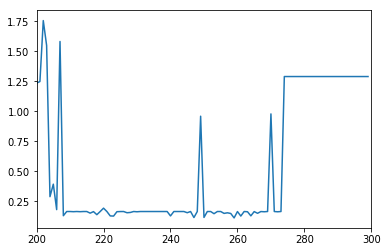

model_free_bayes_opt_217_1_17-24-29-9501


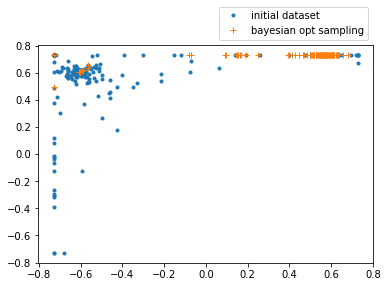

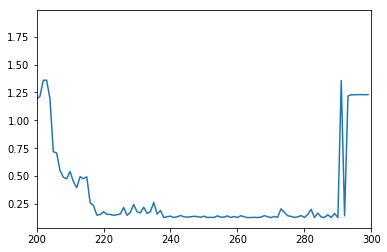

model_free_bayes_opt_217_1_17-24-25-5486


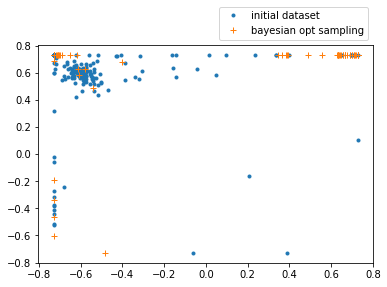

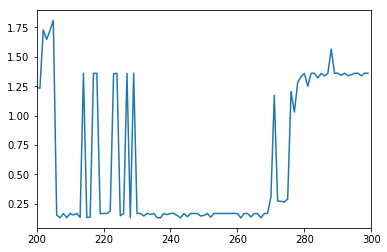

model_free_bayes_opt_217_1_17-24-27-7479


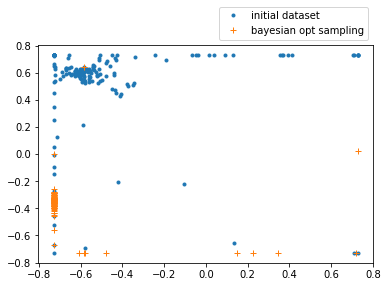

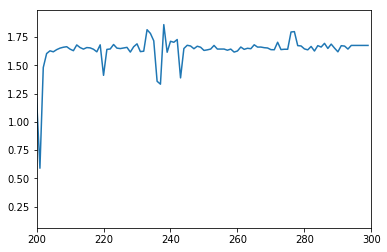

model_free_bayes_opt_217_1_17-24-25-5493


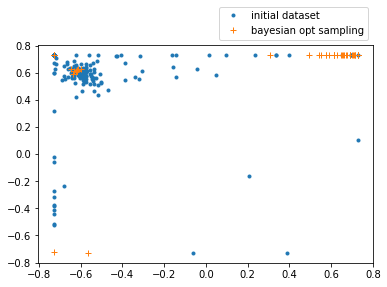

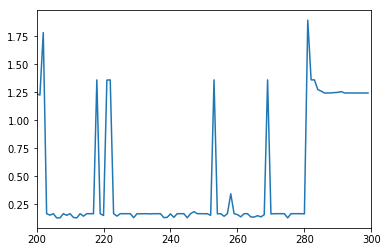

model_free_bayes_opt_217_1_17-24-27-7499


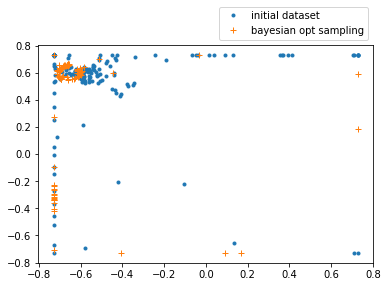

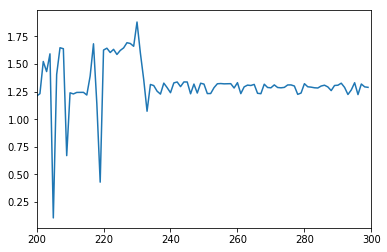

model_free_bayes_opt_217_1_17-24-27-7478


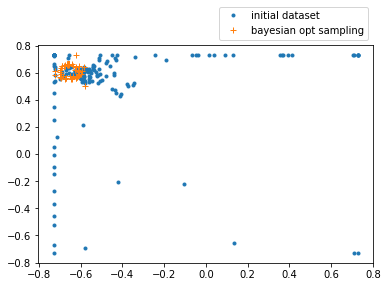

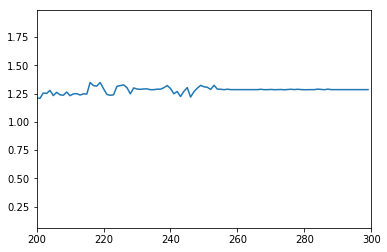

In [22]:
are_mfbo2_arena_ei_10 = "/home/le_goff/are-logs/are_mfbo2_ei_10/"
for folder in os.listdir(are_mfbo2_arena_ei_10) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_arena_ei_10 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    #     ax2.set_ylim(-0.75,0.75)
    #     ax2.set_xlim(-0.75,0.75)
    plt.plot(x[:200],y[:200],'.',label="initial dataset")
    plt.plot(x[200:],y[200:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([200,300])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_217_1_17-15-53-3055


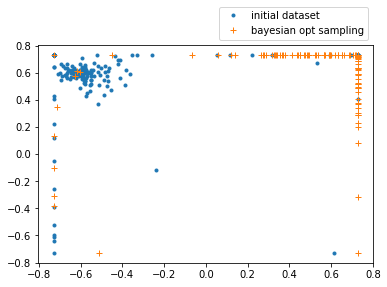

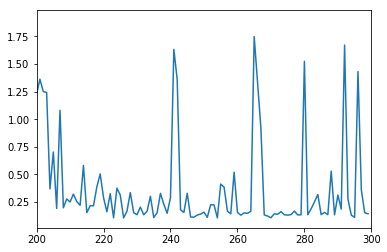

model_free_bayes_opt_217_1_17-15-49-9033


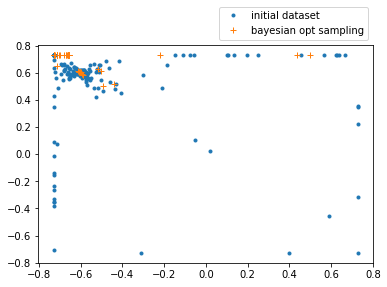

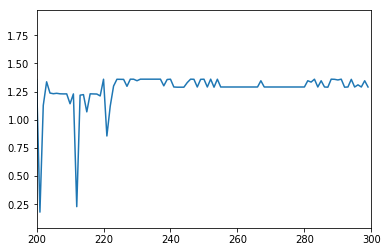

model_free_bayes_opt_217_1_17-15-47-7117


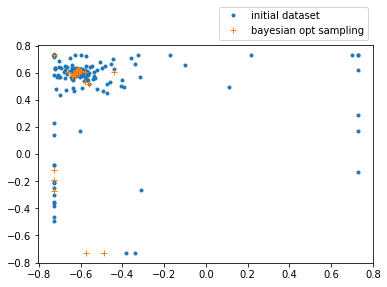

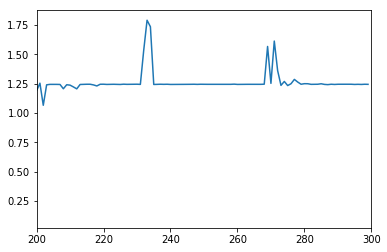

model_free_bayes_opt_217_1_17-15-49-9037


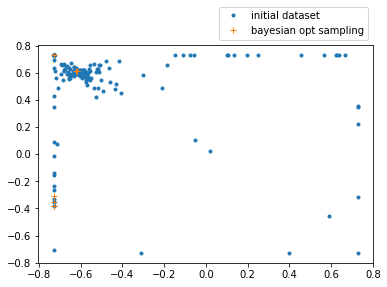

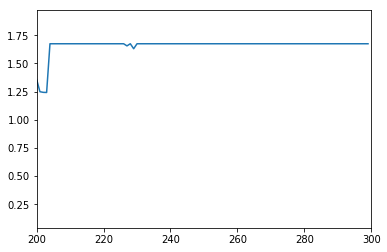

model_free_bayes_opt_217_1_17-15-49-9093


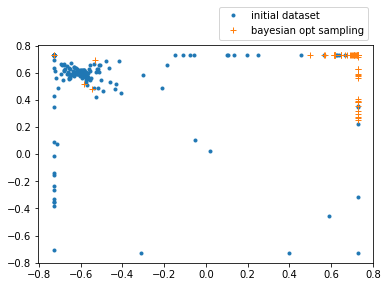

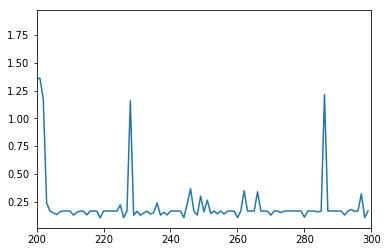

model_free_bayes_opt_217_1_17-15-51-1059


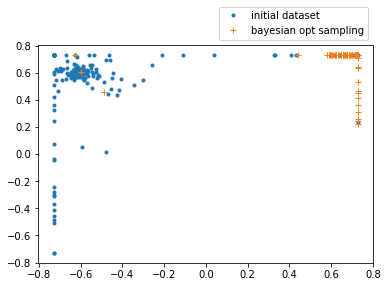

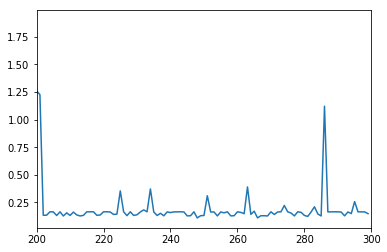

model_free_bayes_opt_217_1_17-15-47-7115


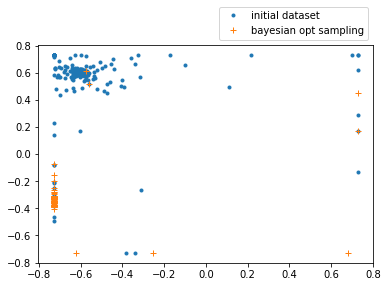

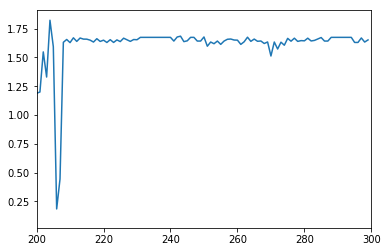

model_free_bayes_opt_217_1_17-15-49-9038


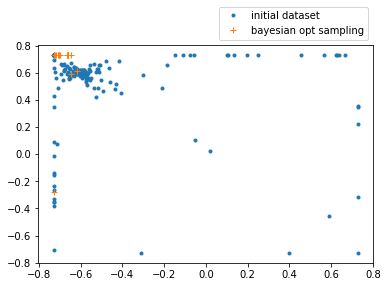

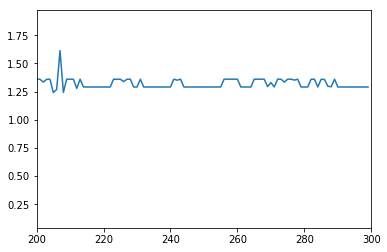

model_free_bayes_opt_217_1_17-15-49-9042


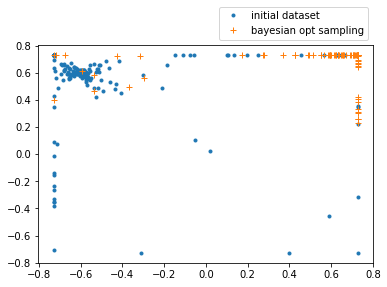

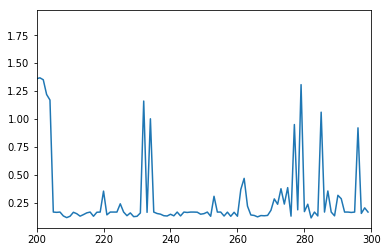

model_free_bayes_opt_217_1_17-15-49-9035


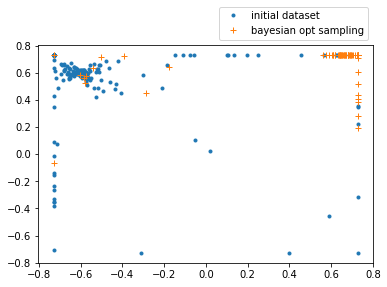

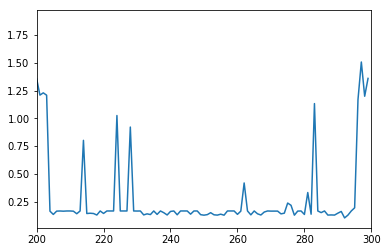

In [23]:
are_mfbo2_arena_ei_100 = "/home/le_goff/are-logs/are_mfbo2_ei_100/"
for folder in os.listdir(are_mfbo2_arena_ei_100) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_arena_ei_100 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    #     ax2.set_ylim(-0.75,0.75)
    #     ax2.set_xlim(-0.75,0.75)
    plt.plot(x[:200],y[:200],'.',label="initial dataset")
    plt.plot(x[200:],y[200:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([200,300])
    plt.plot(r)
    plt.show()

7 200
8 150
6 120
6 110


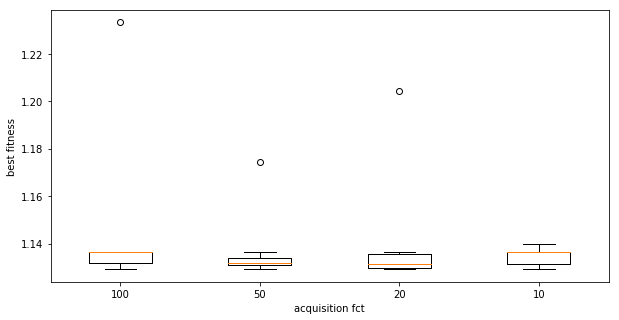

In [15]:
list_dir = ["/home/le_goff/are-logs/are_mfbo2_id_100/", \
            "/home/le_goff/are-logs/are_mfbo2_id_50/", \
            "/home/le_goff/are-logs/are_mfbo2_id_20/", \
            "/home/le_goff/are-logs/are_mfbo2_id_10/"]
list_label = ["100","50","20","10"]
best_fits = []
i = 0
for dire in list_dir :
    fitnesses = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "model") :
            continue
        x, y = load_final_pos(dire + folder + "/final_pos.csv")
        fitnesses.append(rewards(zip(x,y)))
    print(len(fitnesses),len(fitnesses[0]))
    best_fits.append(best_fit(fitnesses,int(list_label[i])))
    i+=1
plt.figure(figsize=(10,5))
plt.boxplot(best_fits,labels=list_label)
plt.ylabel("best fitness")
plt.xlabel("acquisition fct")
plt.show()

model_free_bayes_opt_218_1_15-35-6-6726


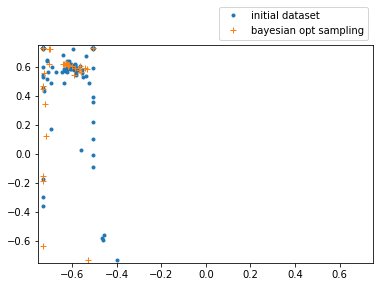

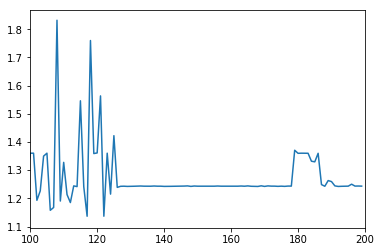

model_free_bayes_opt_218_1_15-35-6-6712


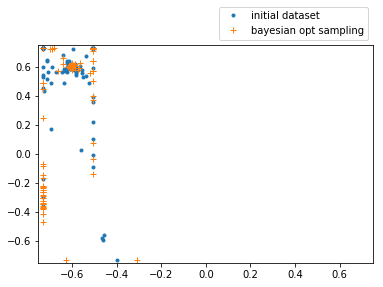

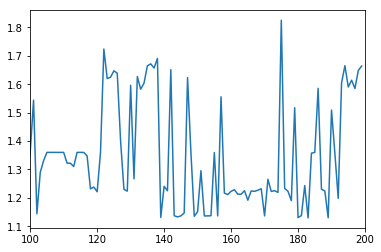

model_free_bayes_opt_218_1_15-35-6-6697


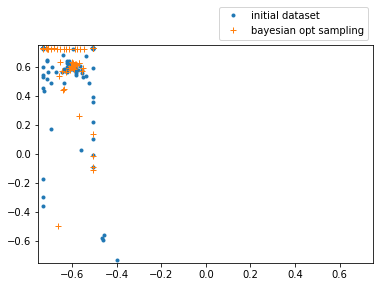

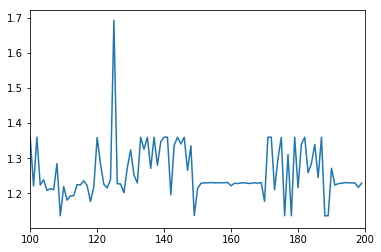

model_free_bayes_opt_218_1_15-35-4-4723


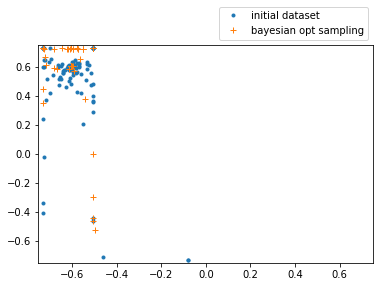

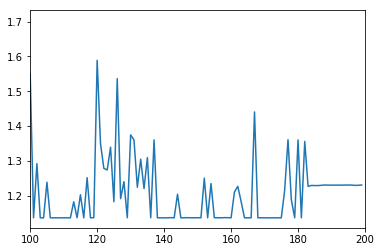

model_free_bayes_opt_218_1_15-35-4-4789


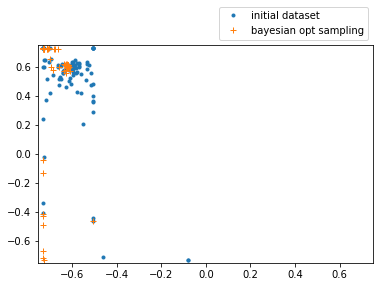

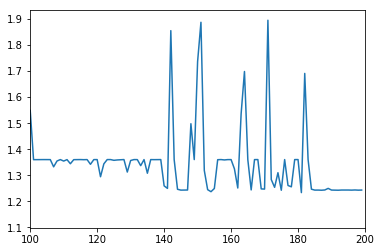

model_free_bayes_opt_218_1_15-35-4-4788


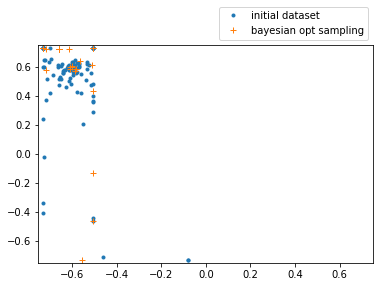

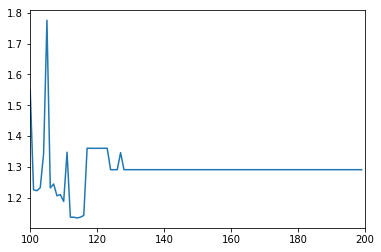

model_free_bayes_opt_218_1_15-35-8-8732


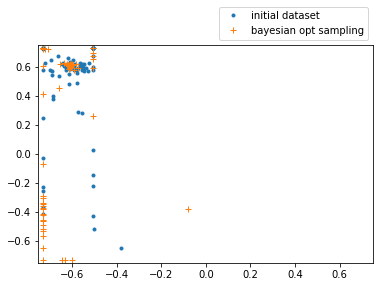

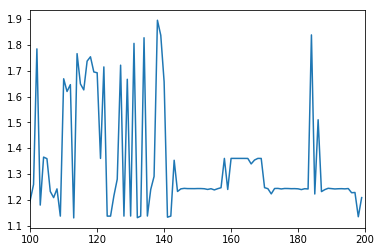

In [10]:
are_mfbo2_race_id_100 = "/home/le_goff/are-logs/are_mfbo2_id_100/"
for folder in os.listdir(are_mfbo2_race_id_100) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_race_id_100 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-0.75,0.75)
    ax2.set_xlim(-0.75,0.75)
    plt.plot(x[:100],y[:100],'.',label="initial dataset")
    plt.plot(x[100:],y[100:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([100,200])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_218_1_15-38-29-9015


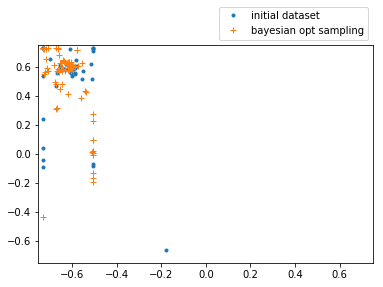

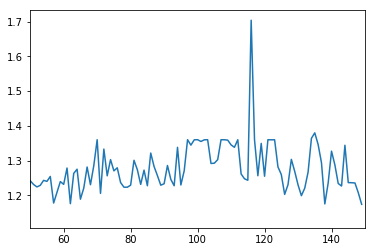

model_free_bayes_opt_218_1_15-38-27-7043


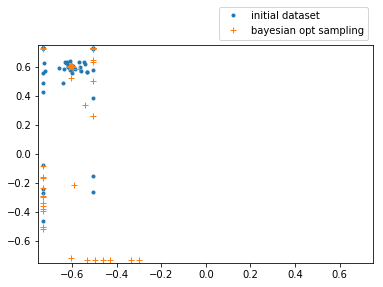

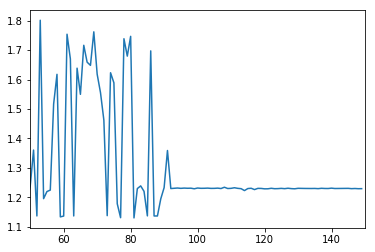

model_free_bayes_opt_218_1_15-38-29-9014


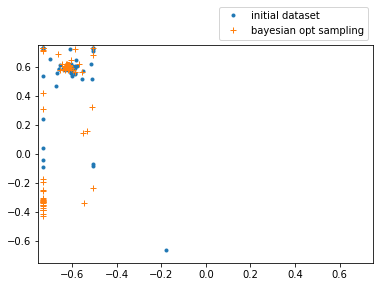

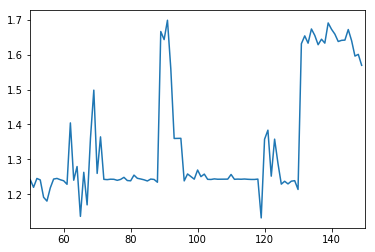

model_free_bayes_opt_218_1_15-38-29-9028


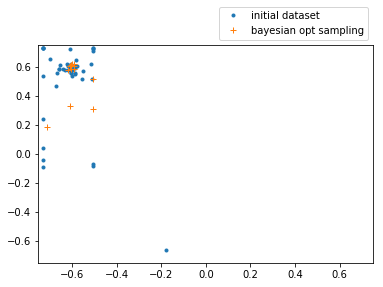

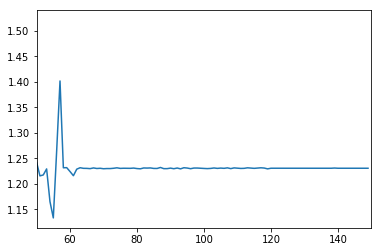

model_free_bayes_opt_218_1_15-38-27-7044


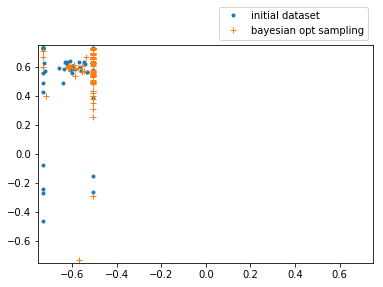

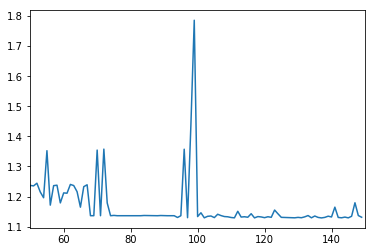

model_free_bayes_opt_218_1_15-38-30-968


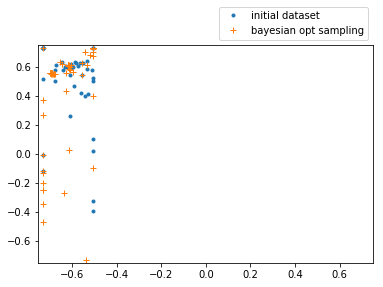

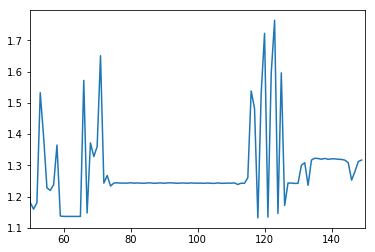

model_free_bayes_opt_218_1_15-38-27-7051


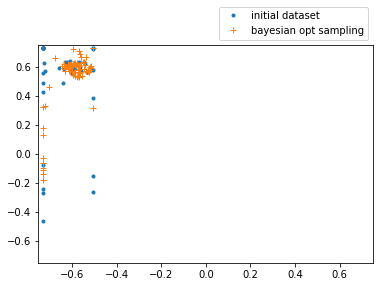

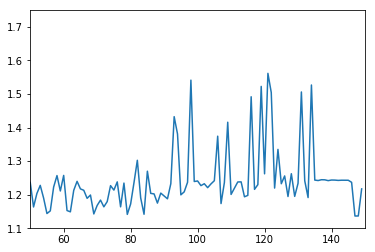

model_free_bayes_opt_218_1_15-38-30-978


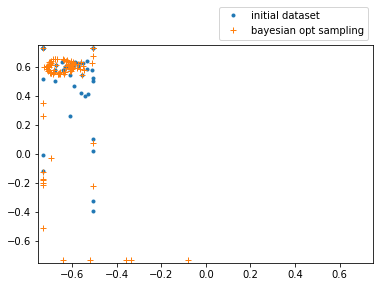

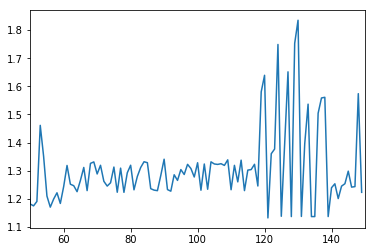

In [12]:
are_mfbo2_race_id_50 = "/home/le_goff/are-logs/are_mfbo2_id_50/"
for folder in os.listdir(are_mfbo2_race_id_50) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_race_id_50 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-0.75,0.75)
    ax2.set_xlim(-0.75,0.75)
    plt.plot(x[:50],y[:50],'.',label="initial dataset")
    plt.plot(x[50:],y[50:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([50,150])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_218_1_15-39-9-9424


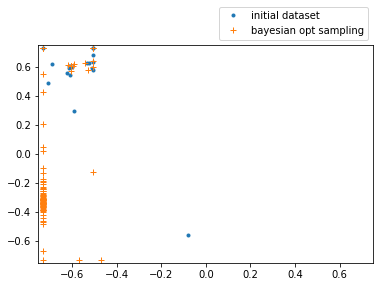

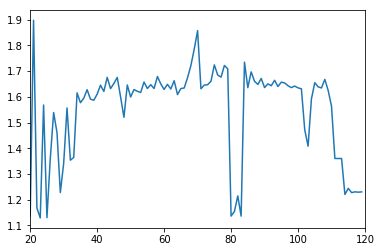

model_free_bayes_opt_218_1_15-39-5-5540


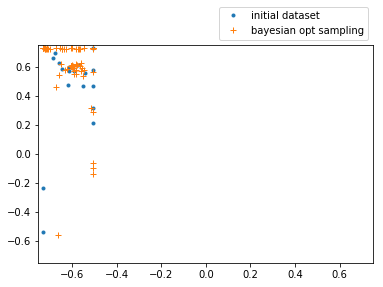

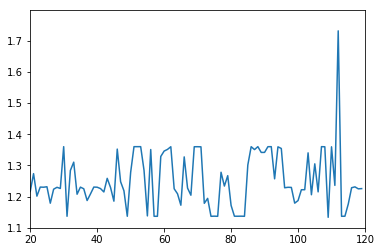

model_free_bayes_opt_218_1_15-39-7-7421


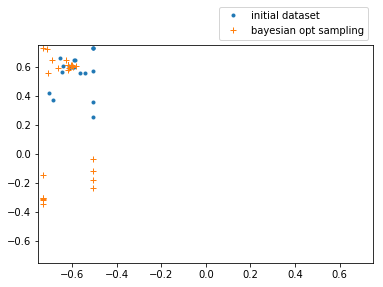

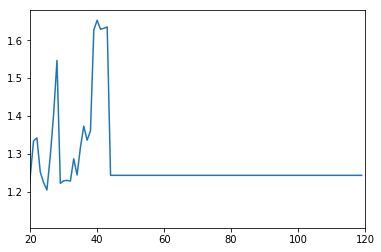

model_free_bayes_opt_218_1_15-39-7-7459


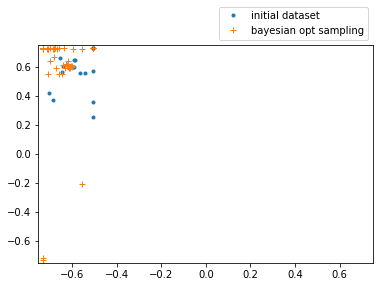

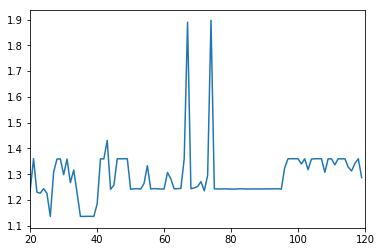

model_free_bayes_opt_218_1_15-39-5-5474


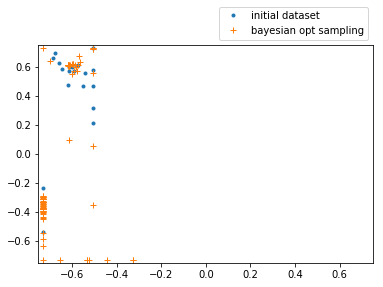

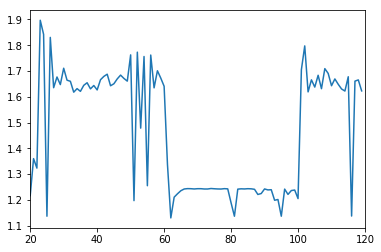

model_free_bayes_opt_218_1_15-39-7-7460


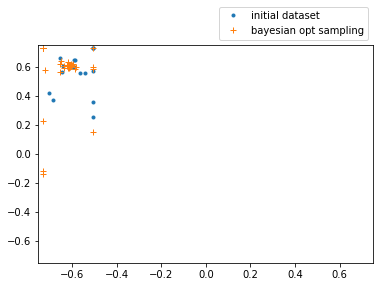

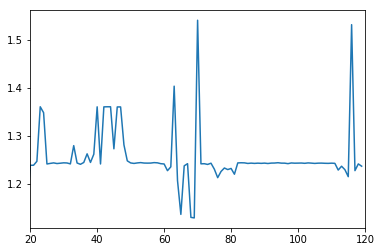

In [13]:
are_mfbo2_race_id_20 = "/home/le_goff/are-logs/are_mfbo2_id_20/"
for folder in os.listdir(are_mfbo2_race_id_20) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_race_id_20 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-0.75,0.75)
    ax2.set_xlim(-0.75,0.75)
    plt.plot(x[:20],y[:20],'.',label="initial dataset")
    plt.plot(x[20:],y[20:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([20,120])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_218_1_15-39-49-9369


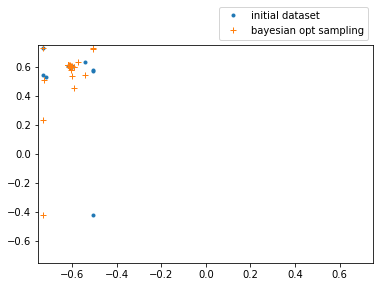

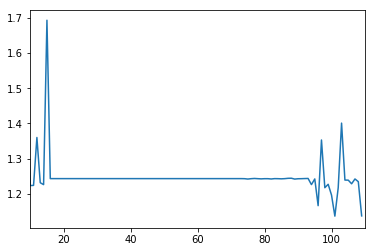

model_free_bayes_opt_218_1_15-39-47-7463


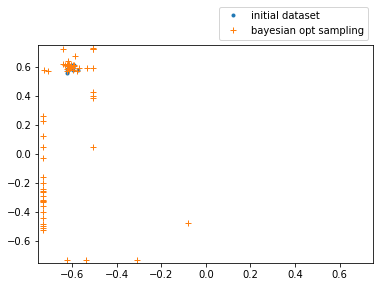

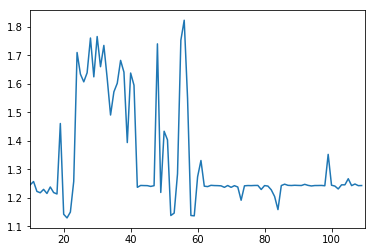

model_free_bayes_opt_218_1_15-39-49-9362


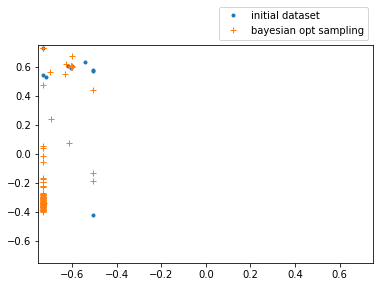

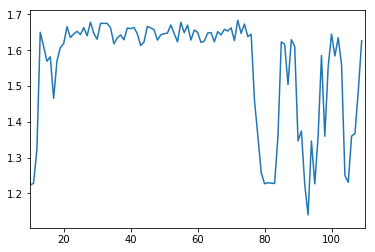

model_free_bayes_opt_218_1_15-39-47-7465


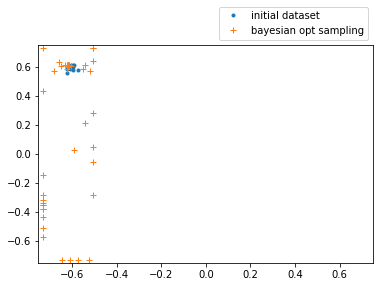

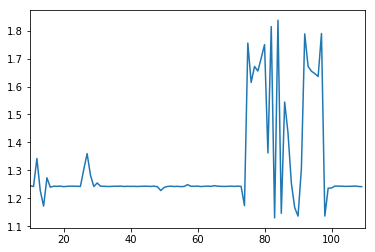

model_free_bayes_opt_218_1_15-39-49-9367


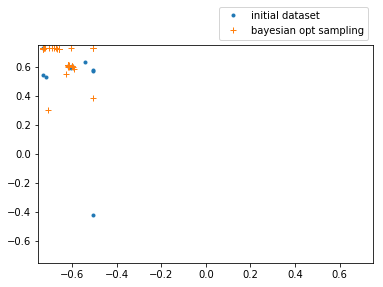

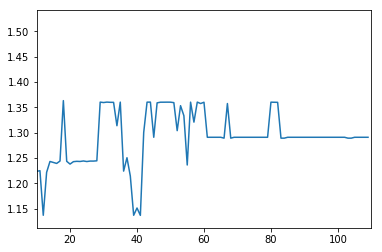

model_free_bayes_opt_218_1_15-39-47-7528


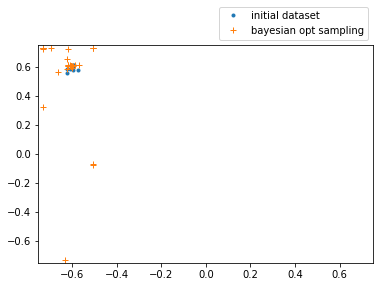

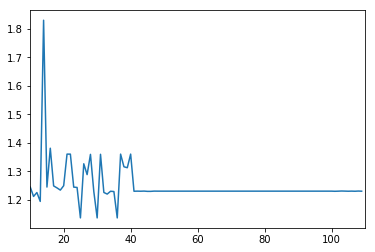

In [14]:
are_mfbo2_race_id_10 = "/home/le_goff/are-logs/are_mfbo2_id_10/"
for folder in os.listdir(are_mfbo2_race_id_10) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_race_id_10 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-0.75,0.75)
    ax2.set_xlim(-0.75,0.75)
    plt.plot(x[:10],y[:10],'.',label="initial dataset")
    plt.plot(x[10:],y[10:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([10,110])
    plt.plot(r)
    plt.show()

11 300
10 200
7 150
8 120
10 110


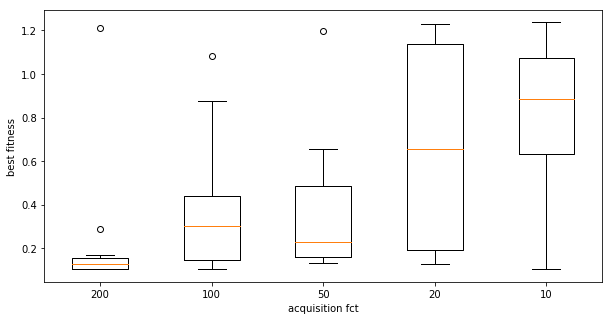

In [19]:
list_dir = ["/home/le_goff/are-logs/are_mfbo2_ei_01/", \
            "/home/le_goff/are-logs/are_mfbo2_arena_id_100/", \
            "/home/le_goff/are-logs/are_mfbo2_arena_id_50/", \
            "/home/le_goff/are-logs/are_mfbo2_arena_id_20/", \
            "/home/le_goff/are-logs/are_mfbo2_arena_id_10/"]
list_label = ["200","100","50","20","10"]
best_fits = []
i = 0
for dire in list_dir :
    fitnesses = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "model") :
            continue
        x, y = load_final_pos(dire + folder + "/final_pos.csv")
        fitnesses.append(rewards(zip(x,y)))
    print(len(fitnesses),len(fitnesses[0]))
    best_fits.append(best_fit(fitnesses,int(list_label[i])))
    i+=1
plt.figure(figsize=(10,5))
plt.boxplot(best_fits,labels=list_label)
plt.ylabel("best fitness")
plt.xlabel("acquisition fct")
plt.show()

8 300
7 200
8 150
8 120
5 110


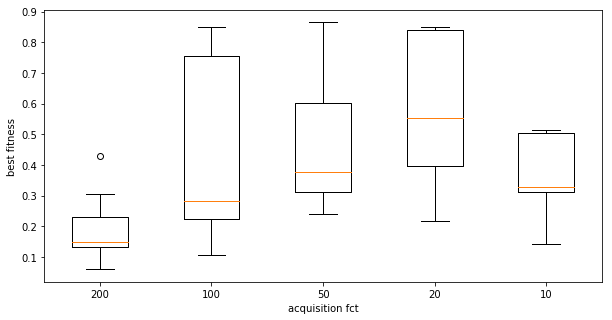

In [8]:
list_dir = ["/home/leni/are-logs/are_mfbo2_id_200_2/", \
            "/home/leni/are-logs/are_mfbo2_id_100_2/", \
            "/home/leni/are-logs/are_mfbo2_id_50_2/", \
            "/home/leni/are-logs/are_mfbo2_id_20_2/", \
            "/home/leni/are-logs/are_mfbo2_id_10_2/"]
list_label = ["200","100","50","20","10"]
best_fits = []
i = 0
for dire in list_dir :
    fitnesses = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "model") :
            continue
        x, y = load_final_pos(dire + folder + "/final_pos.csv")
        fitnesses.append(rewards(zip(x,y)))
    print(len(fitnesses),len(fitnesses[0]))
    best_fits.append(best_fit(fitnesses,int(list_label[i])))
    i+=1
plt.figure(figsize=(10,5))
plt.boxplot(best_fits,labels=list_label)
plt.ylabel("best fitness")
plt.xlabel("acquisition fct")
plt.show()

model_free_bayes_opt_221_1_13-29-47-7153


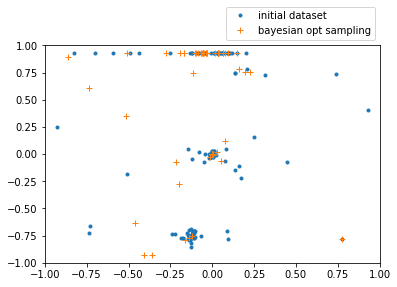

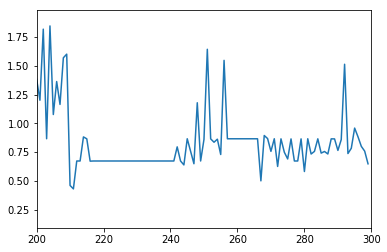

model_free_bayes_opt_221_1_13-29-49-9096


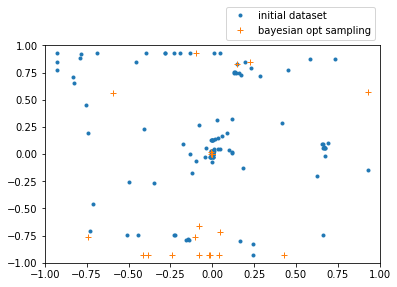

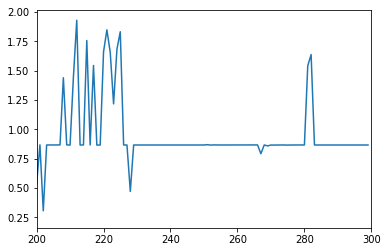

model_free_bayes_opt_221_1_13-29-49-9097


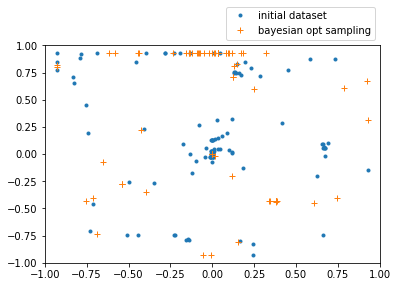

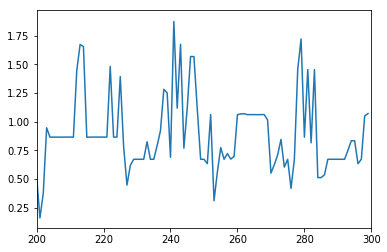

model_free_bayes_opt_221_1_13-29-47-7152


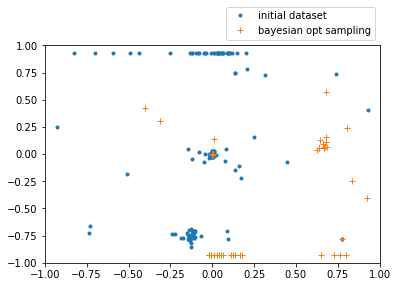

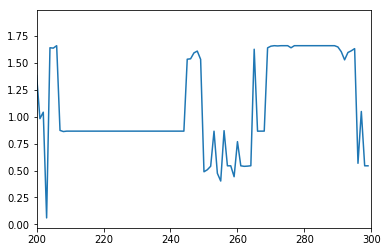

model_free_bayes_opt_221_1_13-29-49-9110


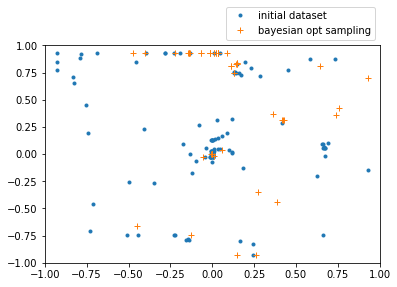

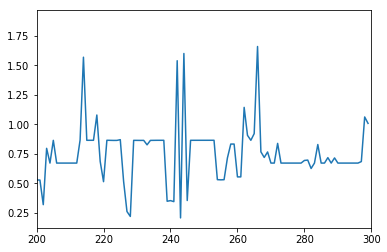

model_free_bayes_opt_221_1_13-29-49-9133


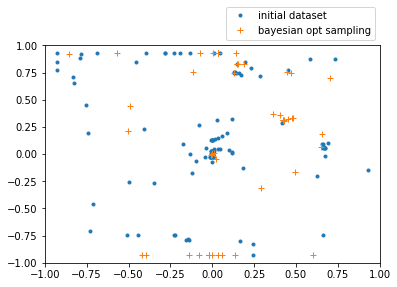

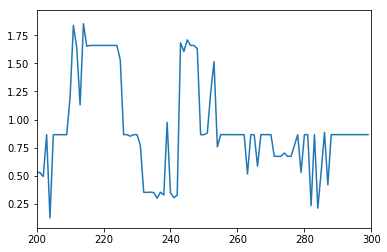

model_free_bayes_opt_221_1_13-29-49-9121


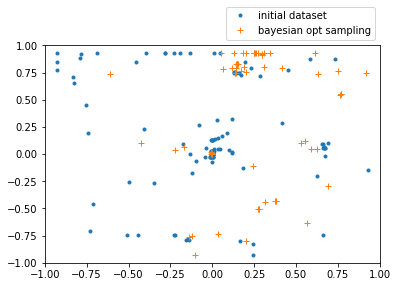

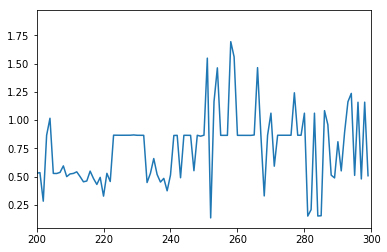

model_free_bayes_opt_221_1_13-29-47-7151


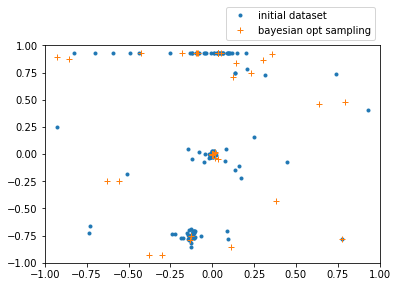

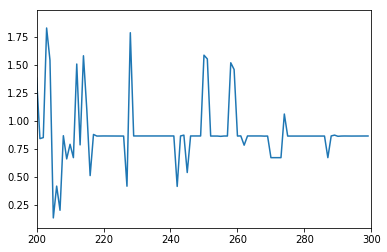

In [14]:
are_mfbo2_arena_id_200_2 = "/home/leni/are-logs/are_mfbo2_id_200_2/"
for folder in os.listdir(are_mfbo2_arena_id_200_2) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_arena_id_200_2 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:200],y[:200],'.',label="initial dataset")
    plt.plot(x[200:],y[200:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([200,300])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_221_1_17-9-4-4015


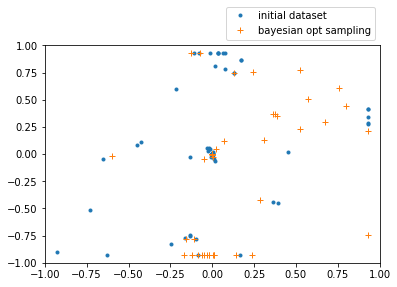

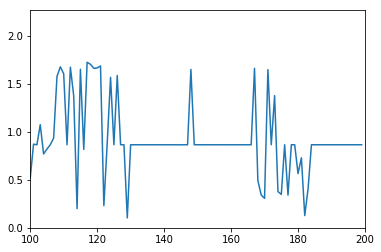

model_free_bayes_opt_221_1_17-9-5-5995


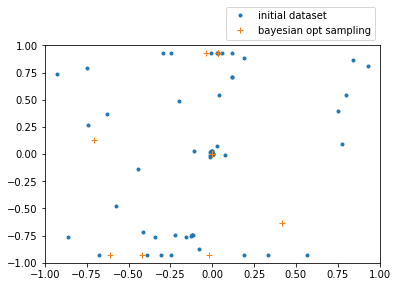

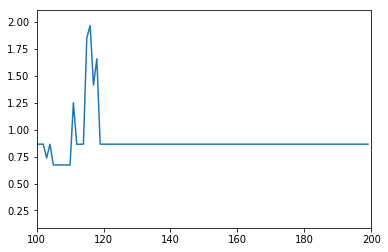

model_free_bayes_opt_221_1_17-9-6-6016


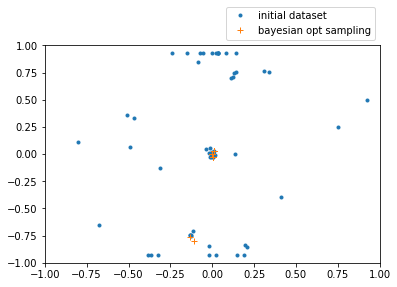

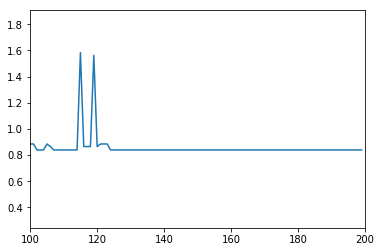

model_free_bayes_opt_221_1_17-9-2-2122


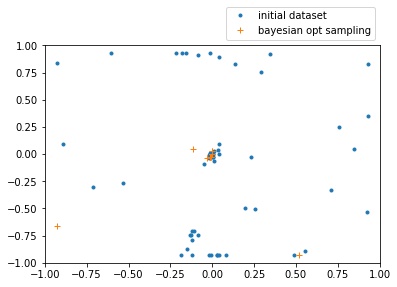

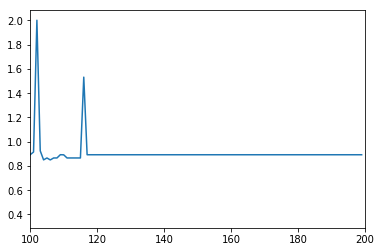

model_free_bayes_opt_221_1_17-9-2-2059


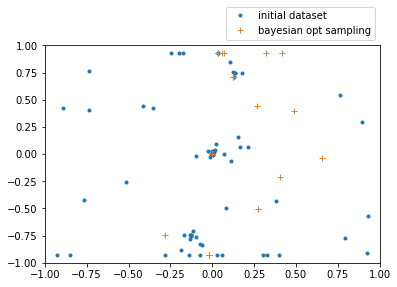

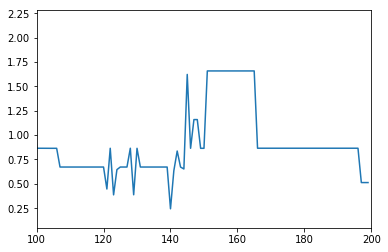

model_free_bayes_opt_221_1_17-9-8-8030


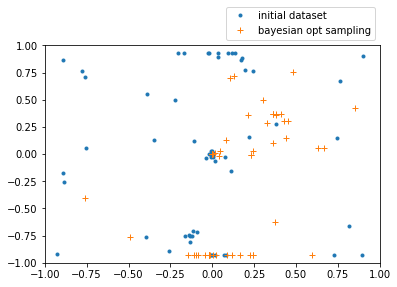

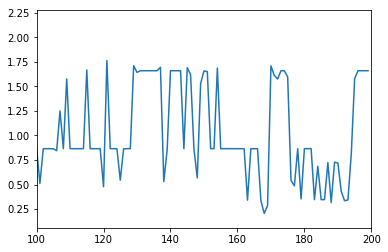

model_free_bayes_opt_221_1_17-9-4-4048


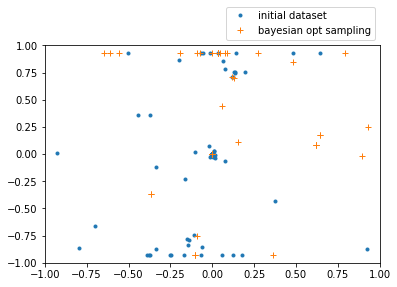

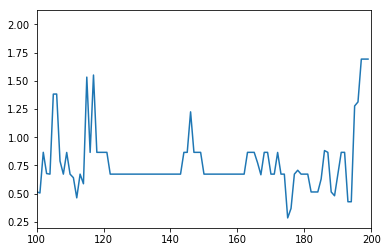

In [15]:
are_mfbo2_arena_id_100_2 = "/home/leni/are-logs/are_mfbo2_id_100_2/"
for folder in os.listdir(are_mfbo2_arena_id_100_2) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_arena_id_100_2 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:100],y[:100],'.',label="initial dataset")
    plt.plot(x[100:],y[100:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([100,200])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_221_1_18-44-51-1798


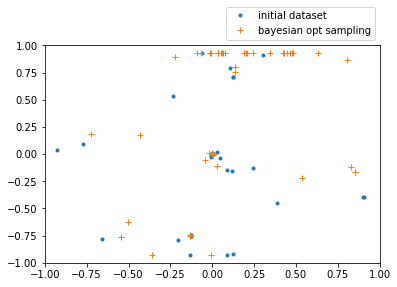

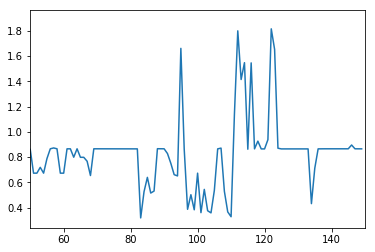

model_free_bayes_opt_221_1_18-44-49-9833


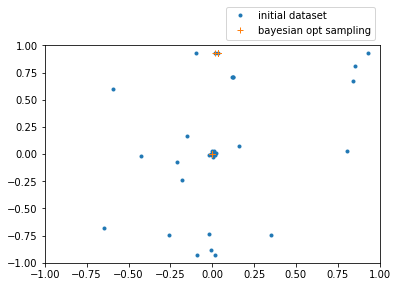

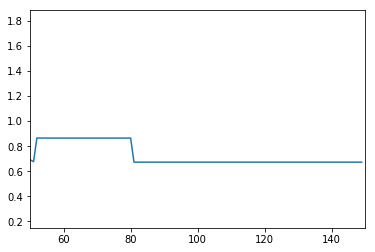

model_free_bayes_opt_221_1_18-44-51-1799


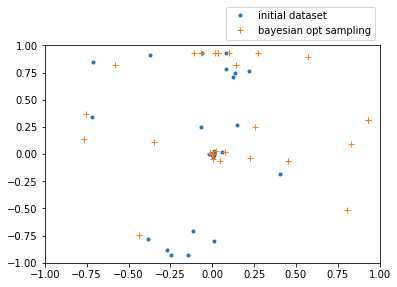

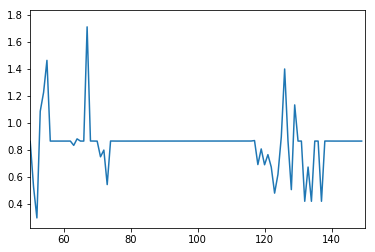

model_free_bayes_opt_221_1_18-44-49-9882


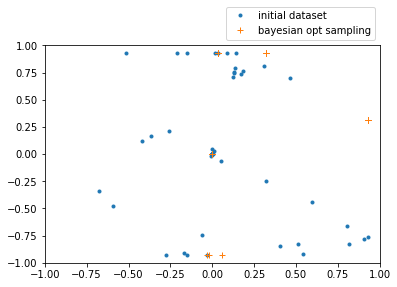

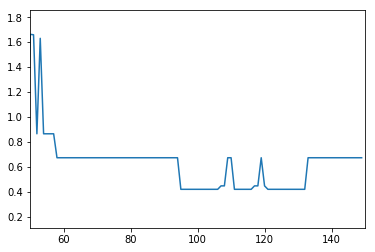

model_free_bayes_opt_221_1_18-44-51-1790


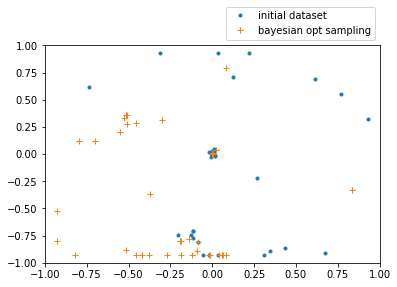

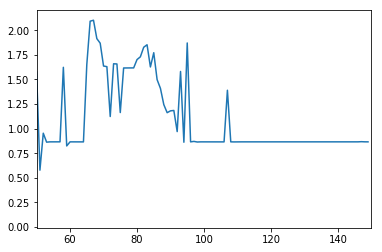

model_free_bayes_opt_221_1_18-44-49-9881


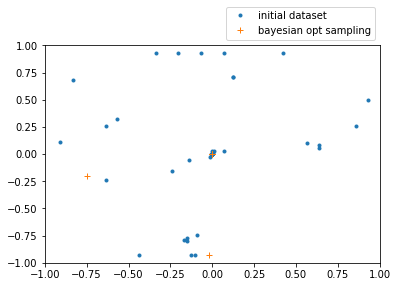

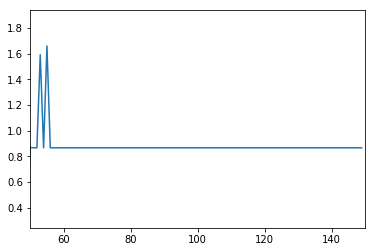

model_free_bayes_opt_221_1_18-44-49-9834


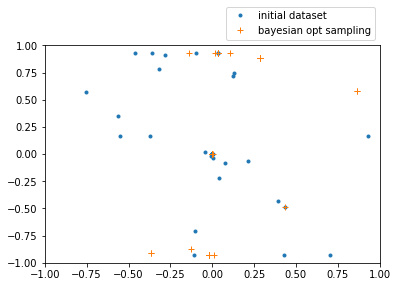

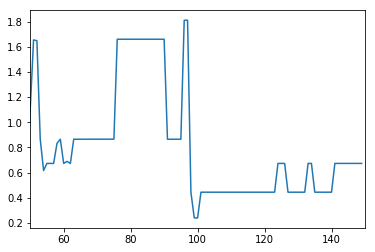

model_free_bayes_opt_221_1_18-44-49-9832


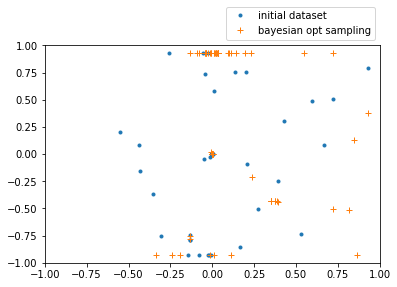

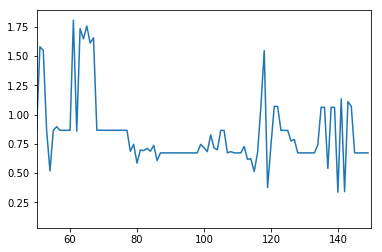

In [16]:
are_mfbo2_arena_id_50_2 = "/home/leni/are-logs/are_mfbo2_id_50_2/"
for folder in os.listdir(are_mfbo2_arena_id_50_2) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_arena_id_50_2 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:50],y[:50],'.',label="initial dataset")
    plt.plot(x[50:],y[50:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([50,150])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_221_1_18-46-19-9120


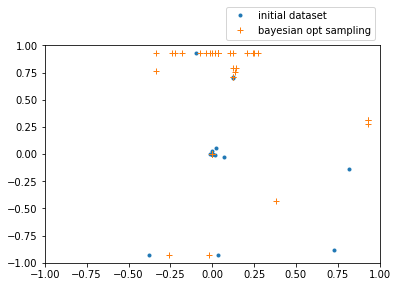

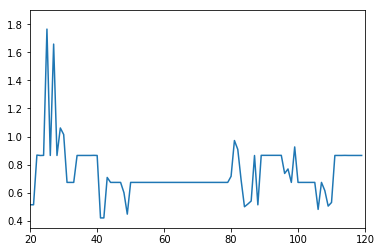

model_free_bayes_opt_221_1_18-46-17-7141


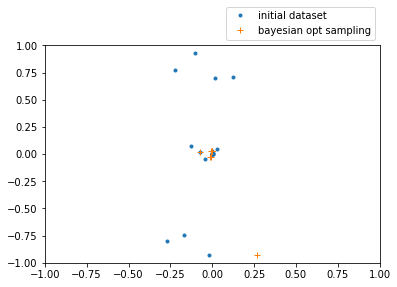

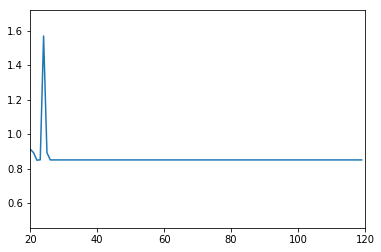

model_free_bayes_opt_221_1_18-46-19-9118


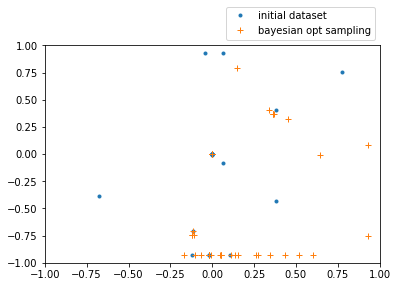

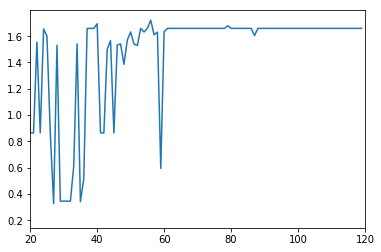

model_free_bayes_opt_221_1_18-46-17-7157


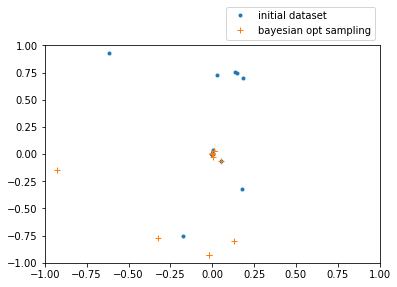

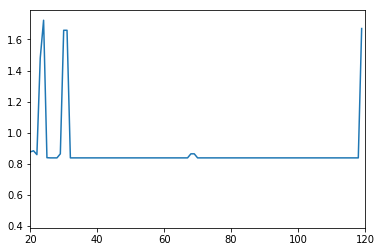

model_free_bayes_opt_221_1_18-46-17-7129


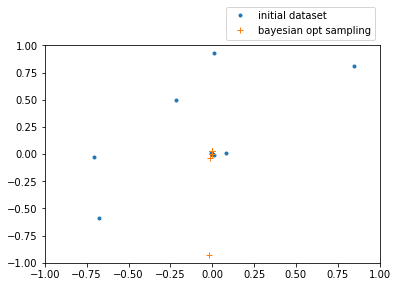

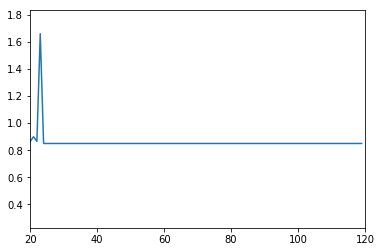

model_free_bayes_opt_221_1_18-46-17-7131


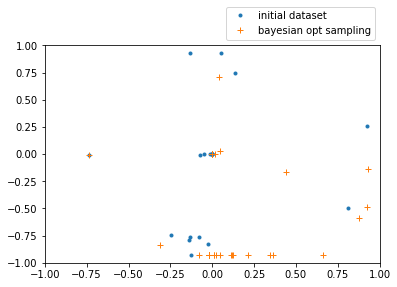

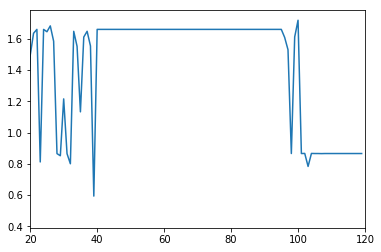

model_free_bayes_opt_221_1_18-46-21-1098


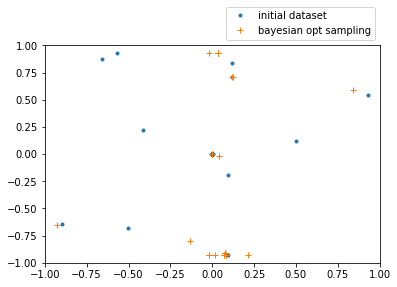

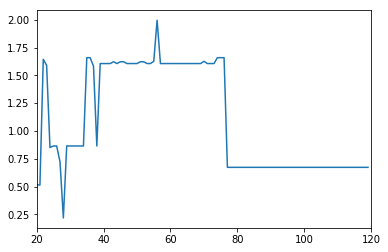

model_free_bayes_opt_221_1_18-46-17-7130


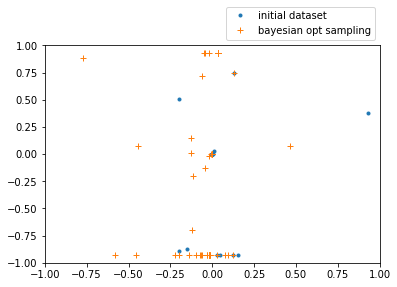

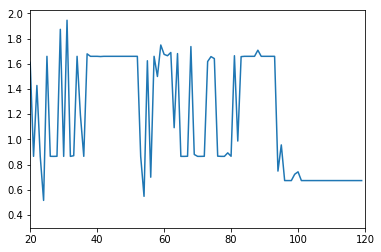

In [18]:
are_mfbo2_arena_id_20_2 = "/home/leni/are-logs/are_mfbo2_id_20_2/"
for folder in os.listdir(are_mfbo2_arena_id_20_2) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_arena_id_20_2 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:20],y[:20],'.',label="initial dataset")
    plt.plot(x[20:],y[20:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([20,120])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_221_1_18-48-55-5958


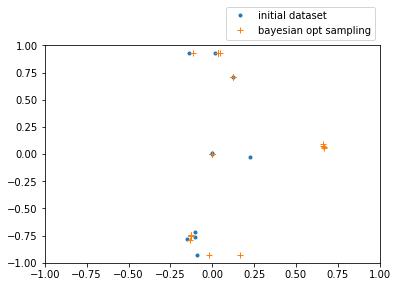

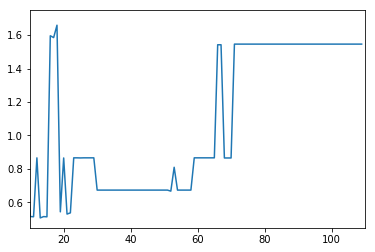

model_free_bayes_opt_221_1_18-48-57-7898


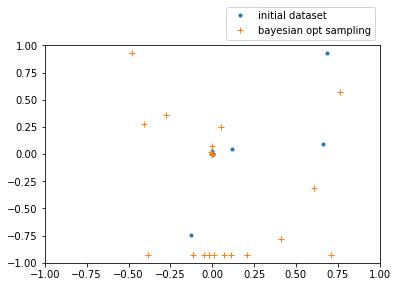

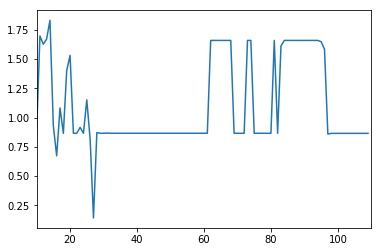

model_free_bayes_opt_221_1_18-48-59-9873


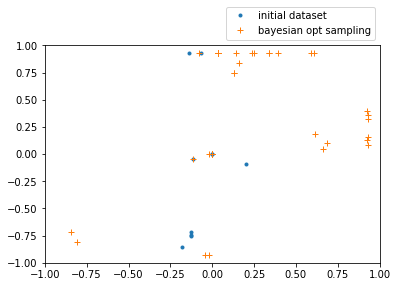

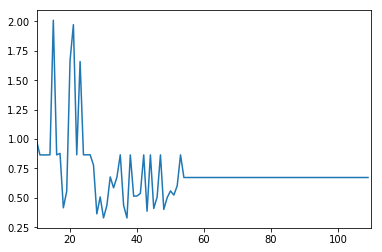

model_free_bayes_opt_221_1_18-48-59-9872


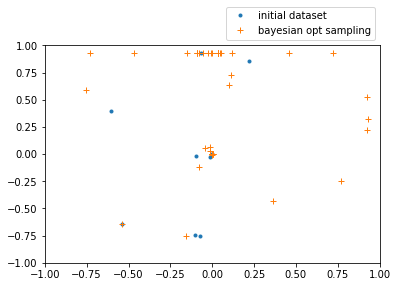

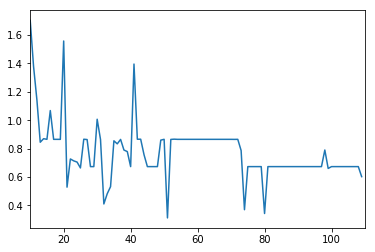

model_free_bayes_opt_221_1_18-49-1-1898


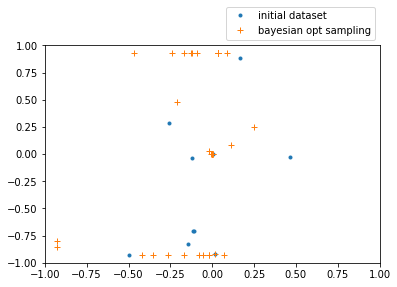

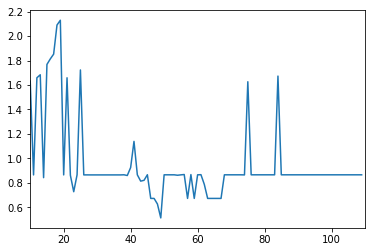

In [19]:
are_mfbo2_arena_id_10_2 = "/home/leni/are-logs/are_mfbo2_id_10_2/"
for folder in os.listdir(are_mfbo2_arena_id_10_2) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo2_arena_id_10_2 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:10],y[:10],'.',label="initial dataset")
    plt.plot(x[10:],y[10:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([10,110])
    plt.plot(r)
    plt.show()

8 300
8 300
8 300
9 300
8 300
7 300
17 300


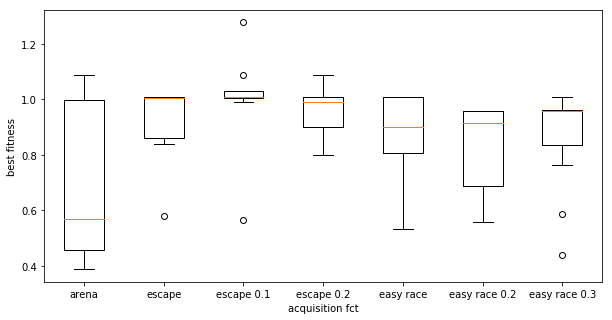

In [25]:
list_dir = ["/home/leni/are-logs/arepuck_mfbo2_arena/", \
            "/home/leni/are-logs/arepuck_mfbo2_escape_0/", \
            "/home/leni/are-logs/arepuck_mfbo2_escape_01/", \
            "/home/leni/are-logs/arepuck_mfbo2_escape_02/", \
            #"/home/leni/are-logs/arepuck_mfbo2_escape_03/", \
           "/home/leni/are-logs/arepuck_mfbo2_easy_race_0/", \
            #"/home/leni/are-logs/arepuck_mfbo2_easy_race_01/", \
            "/home/leni/are-logs/arepuck_mfbo2_easy_race_02/", \
            "/home/leni/are-logs/arepuck_mfbo2_easy_race_03/"]
list_label = ["arena","escape","escape 0.1", "escape 0.2","easy race","easy race 0.2","easy race 0.3"]
best_fits = []
for dire in list_dir :
    fitnesses = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "model") :
            continue
        x, y = load_final_pos(dire + folder + "/final_pos.csv")
        fitnesses.append(rewards(zip(x,y)))
    print(len(fitnesses),len(fitnesses[0]))
    best_fits.append(best_fit(fitnesses,200))
plt.figure(figsize=(10,5))
plt.boxplot(best_fits,labels=list_label)
plt.ylabel("best fitness")
plt.xlabel("acquisition fct")
plt.show()

model_free_bayes_opt_22_2_12-47-16-6968


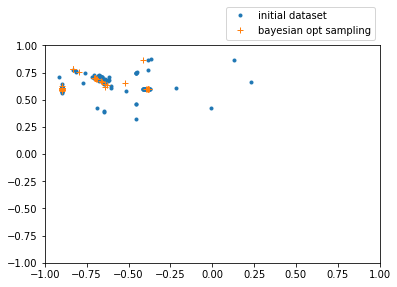

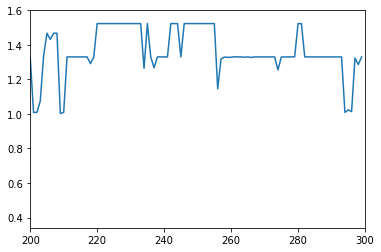

model_free_bayes_opt_22_2_12-47-17-7010


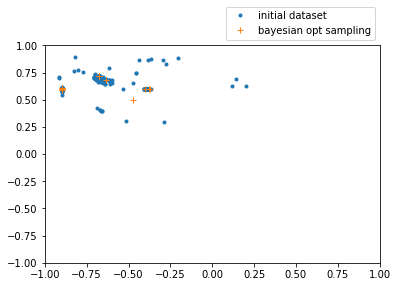

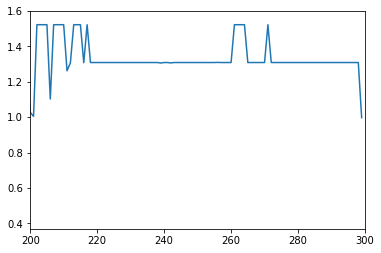

model_free_bayes_opt_22_2_12-47-16-6983


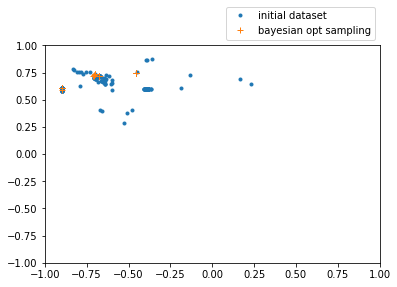

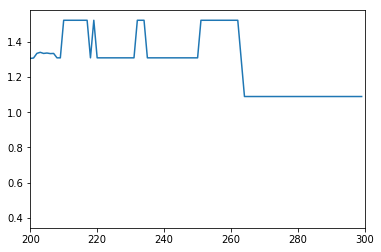

model_free_bayes_opt_22_2_12-47-16-6959


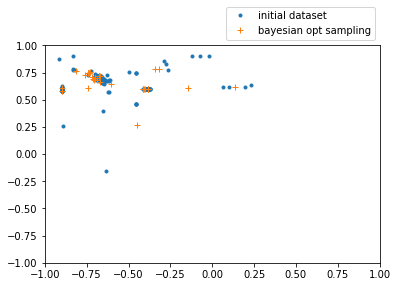

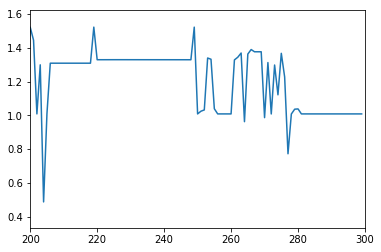

model_free_bayes_opt_22_2_12-47-16-6960


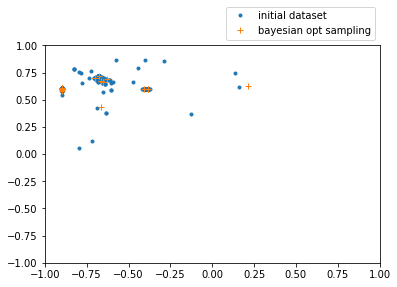

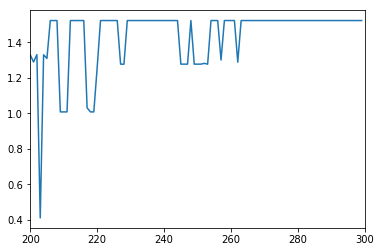

model_free_bayes_opt_22_2_12-47-15-5029


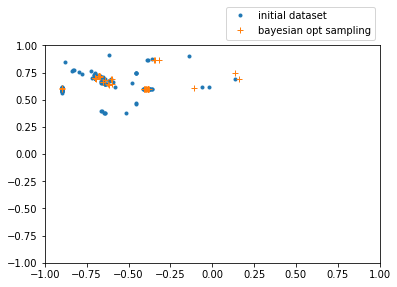

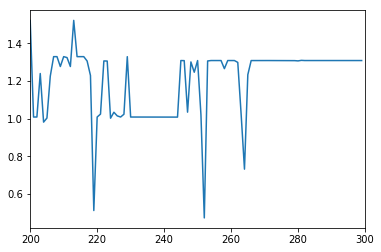

model_free_bayes_opt_22_2_12-47-16-6980


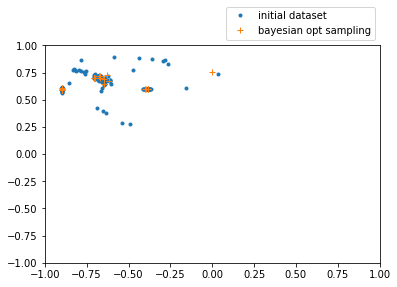

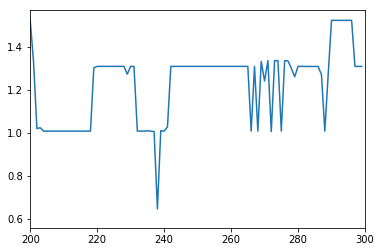

model_free_bayes_opt_22_2_12-47-15-5093


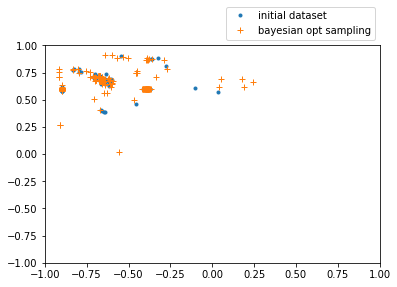

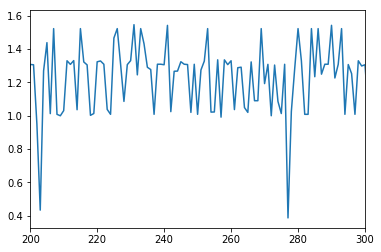

In [20]:
arepuck_mfbo2_arena = "/home/leni/are-logs/arepuck_mfbo2_arena/"
for folder in os.listdir(arepuck_mfbo2_arena) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(arepuck_mfbo2_arena + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:200],y[:200],'.',label="initial dataset")
    plt.plot(x[200:],y[200:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([200,300])
    plt.plot(r)
    plt.show()

model_free_bayes_opt_22_2_12-48-8-8335


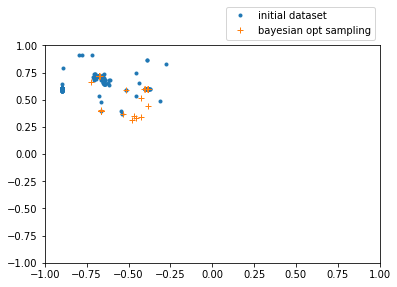

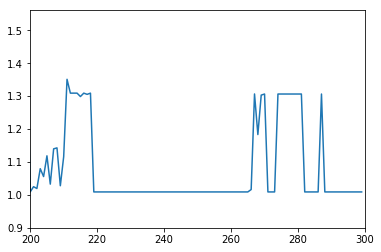

model_free_bayes_opt_22_2_12-48-12-2343


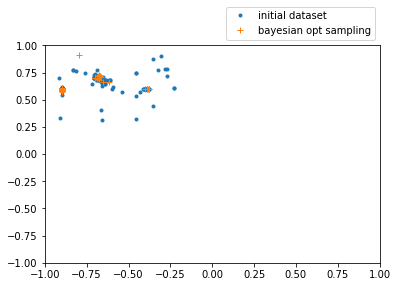

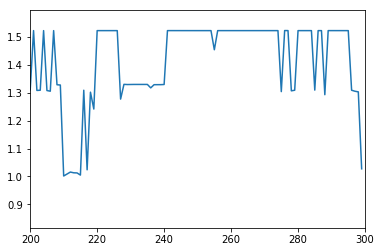

model_free_bayes_opt_22_2_12-48-16-6344


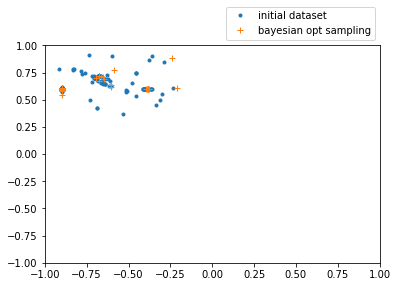

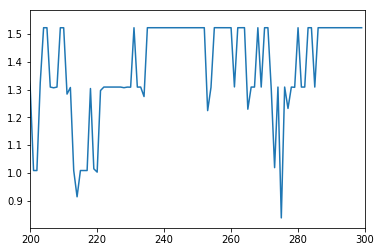

model_free_bayes_opt_22_2_12-48-10-396


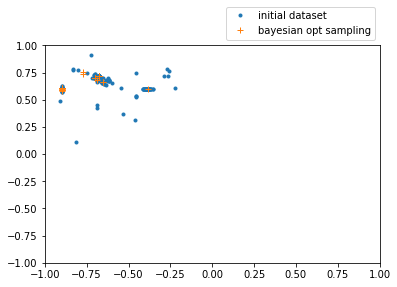

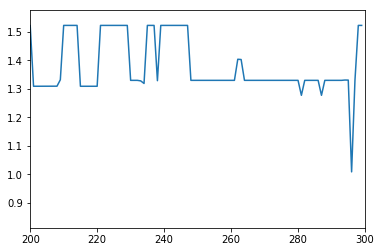

model_free_bayes_opt_22_2_12-48-14-4341


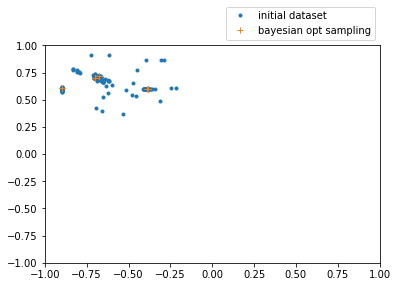

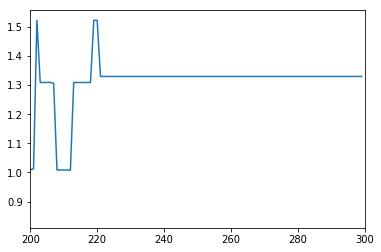

model_free_bayes_opt_22_2_12-48-8-8402


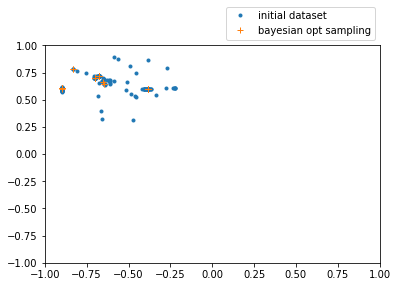

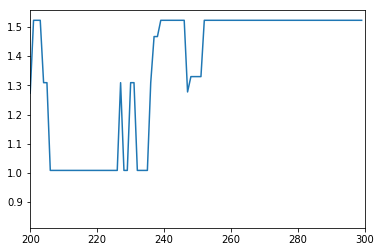

model_free_bayes_opt_22_2_12-48-8-8401


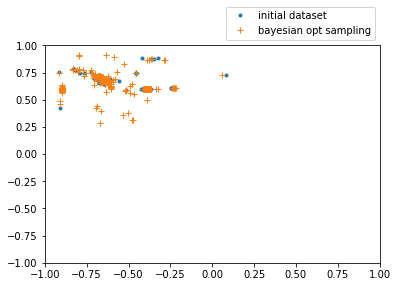

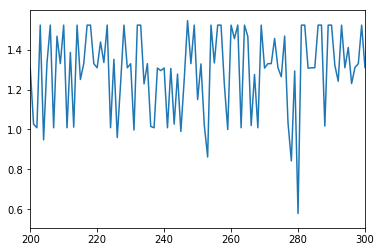

model_free_bayes_opt_22_2_12-48-18-8334


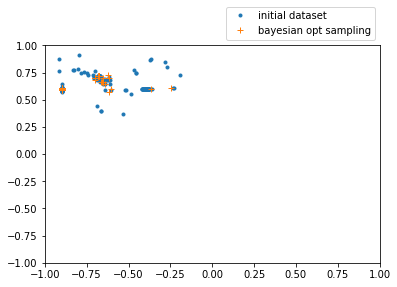

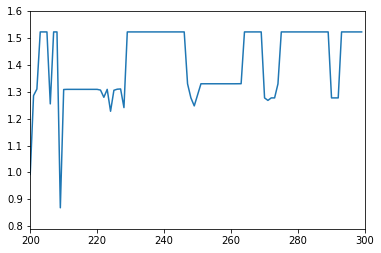

In [31]:
arepuck_mfbo2_escape_0 = "/home/leni/are-logs/arepuck_mfbo2_escape_0/"
for folder in os.listdir(arepuck_mfbo2_escape_0) :
    if(folder.split("_")[0] != "model") :
        continue
    print(folder)
    
    x, y = load_final_pos(arepuck_mfbo2_escape_0 + folder + "/final_pos.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:200],y[:200],'.',label="initial dataset")
    plt.plot(x[200:],y[200:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([200,300])
    plt.plot(r)
    plt.show()

10 300
11 300
5 300
5 400


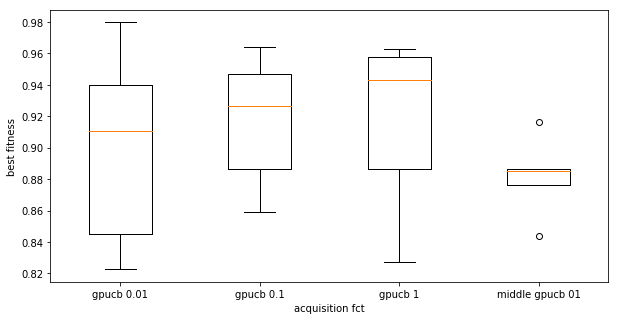

In [52]:
list_dir = ["/home/leni/are-logs/are_mfbo_escape_gpucb001/", \
    "/home/leni/are-logs/are_mfbo_escape_gpucb01/", \
    "/home/leni/are-logs/are_mfbo_escape_gpucb/",\
           "/home/leni/are-logs/are_mfbo_middle_gpucb01/"]
list_label = ["gpucb 0.01","gpucb 0.1","gpucb 1","middle gpucb 01"]
best_fits = []
targets = [[0.75,0.75],[0.75,0.75],[0.75,0.75],[0,0.5]]
i=0
for dire in list_dir :
    fitnesses = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "mfbo") :
            continue
        x, y = load_final_pos(dire + folder + "/bo_data.csv")
        #print(x,y)
        fitnesses.append(rewards(zip(x,y),targets[i]))
    i+=1
    print(len(fitnesses),len(fitnesses[0]))
    best_fits.append(best_fit(fitnesses,100))
plt.figure(figsize=(10,5))
plt.boxplot(best_fits,labels=list_label)
plt.ylabel("best fitness")
plt.xlabel("acquisition fct")
plt.show()

10 350
10 358
10 350
10 350


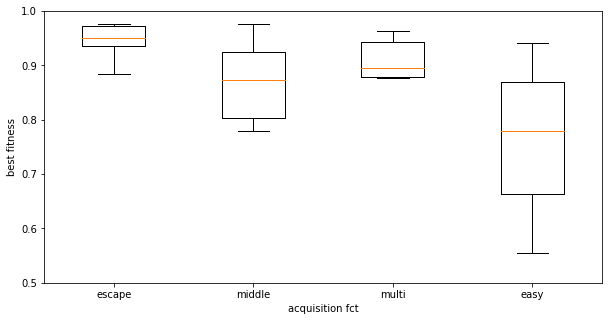

In [19]:
list_dir = ["/home/leni/are-logs/are_mfbo_escape/", \
    "/home/leni/are-logs/are_mfbo_middle/", \
    "/home/leni/are-logs/are_mfbo_multi/",\
           "/home/leni/are-logs/are_mfbo_easy/"]
list_label = ["escape","middle","multi","easy"]
best_fits = []
targets = [[0.75,0.75],[0.,0.5],[0.,-0.5],[0.75,0.75]]
i=0
for dire in list_dir :
    fitnesses = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "mfbo") :
            continue
        x, y = load_obs(dire + folder + "/bo_data.csv")
        #print(x,y)
        fitnesses.append(rewards(zip(x,y),targets[i]))
    i+=1
    print(len(fitnesses),len(fitnesses[0]))
    best_fits.append(best_fit(fitnesses,100))
plt.figure(figsize=(10,5))
plt.boxplot(best_fits,labels=list_label)
plt.ylabel("best fitness")
plt.xlabel("acquisition fct")
plt.ylim(0.5,1)
plt.show()

mfbo_17_3_6-51-23-3220_3078067487


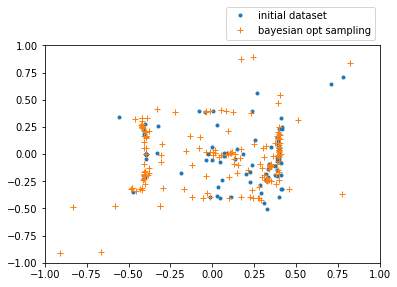

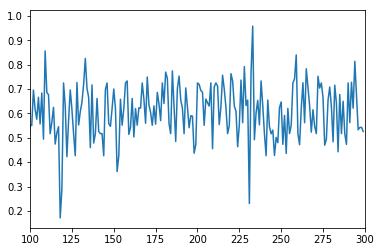

mfbo_17_3_6-51-17-7300_3410641038


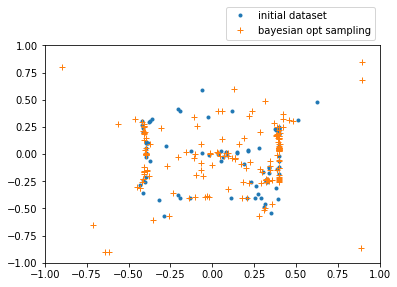

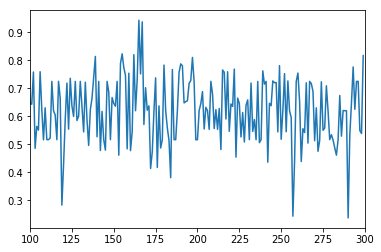

mfbo_17_3_6-51-21-1322_3890601534


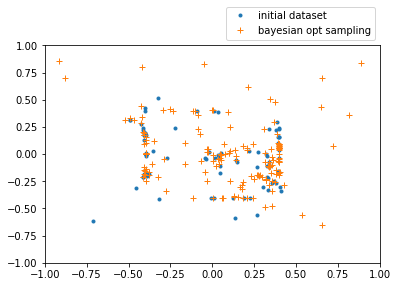

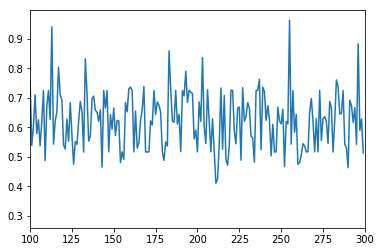

mfbo_17_3_6-51-26-6090_3530234702


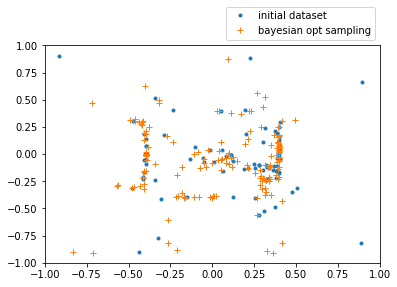

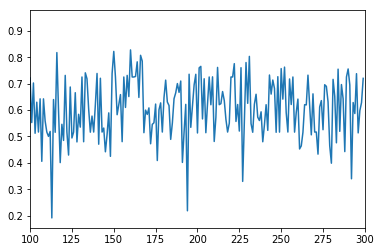

mfbo_17_3_6-51-35-5700_234987687


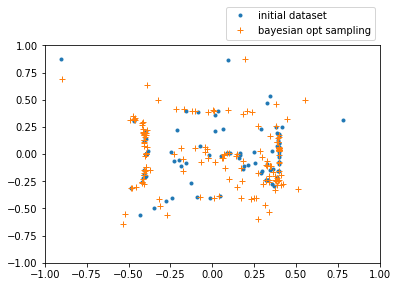

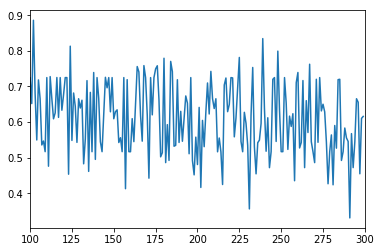

In [21]:
are_mfbo_escape_gpucb = "/home/leni/are-logs/are_mfbo_escape_gpucb/"
for folder in os.listdir(are_mfbo_escape_gpucb) :
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo_escape_gpucb + folder + "/bo_data.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:100],y[:100],'.',label="initial dataset")
    plt.plot(x[100:],y[100:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([100,300])
    plt.plot(r)
    plt.show()

mfbo_17_3_11-51-19-9450_3005871044


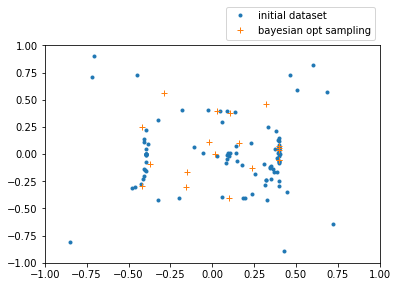

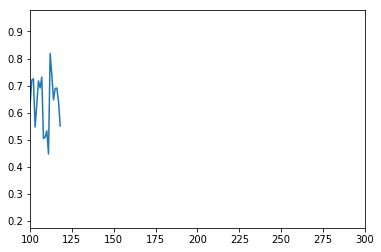

mfbo_17_3_8-59-43-3018_1532351963


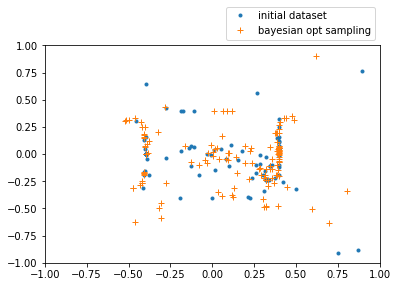

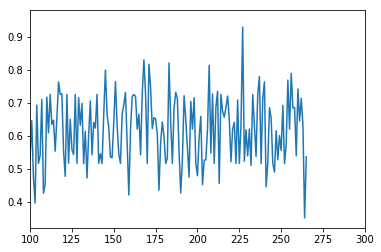

mfbo_17_3_8-59-23-3920_926719688


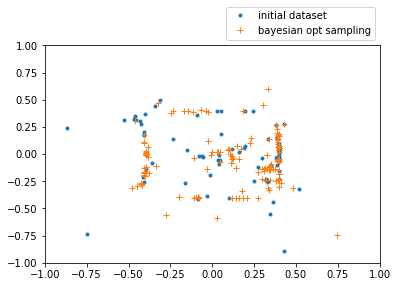

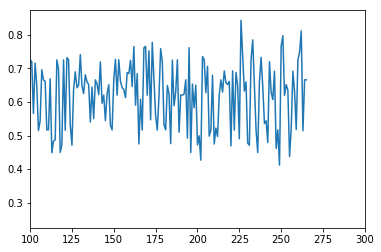

mfbo_17_3_10-40-11-1525_4160444191


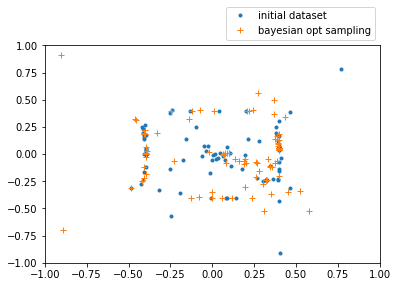

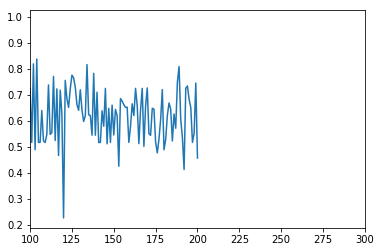

mfbo_17_3_8-59-40-285_2926351475


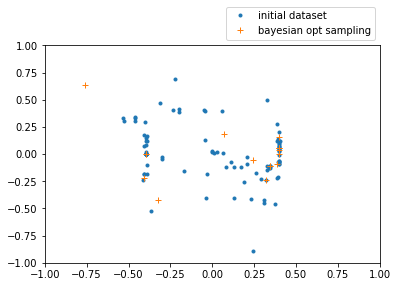

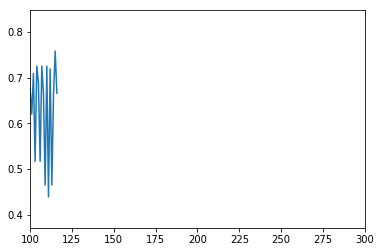

In [22]:
are_mfbo_escape_ei = "/home/leni/are-logs/are_mfbo_escape_ei/"
for folder in os.listdir(are_mfbo_escape_ei) :
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo_escape_ei + folder + "/bo_data.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:100],y[:100],'.',label="initial dataset")
    plt.plot(x[100:],y[100:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([100,300])
    plt.plot(r)
    plt.show()

mfbo_17_3_14-6-37-7237_652074635


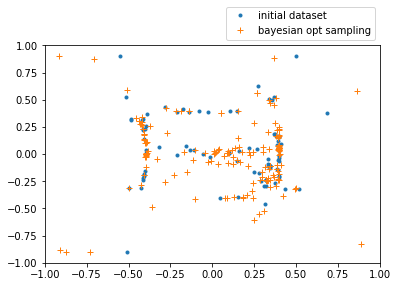

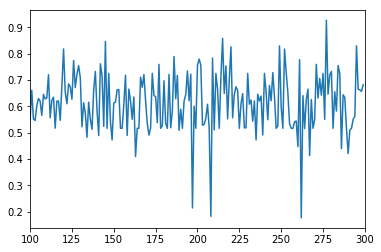

mfbo_17_3_14-18-54-4395_3206595989


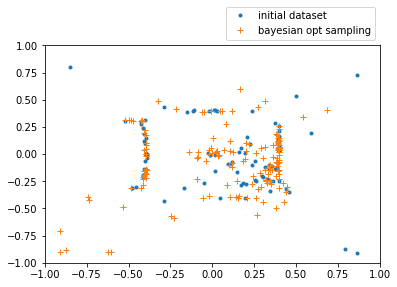

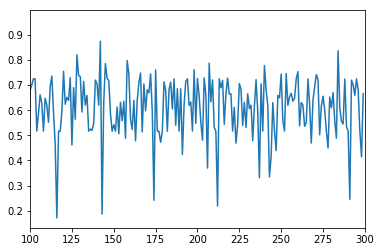

mfbo_17_3_14-6-38-8518_840118625


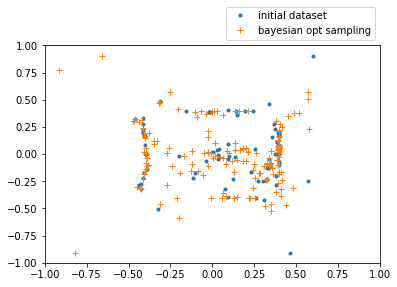

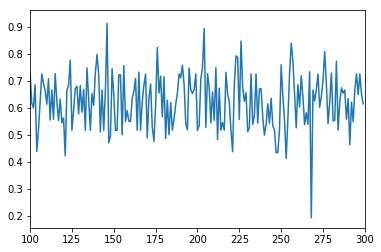

mfbo_17_3_14-6-15-5079_54565814


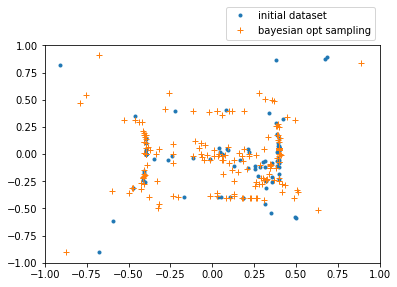

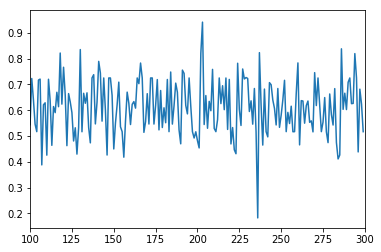

mfbo_17_3_14-6-16-6276_4195521290


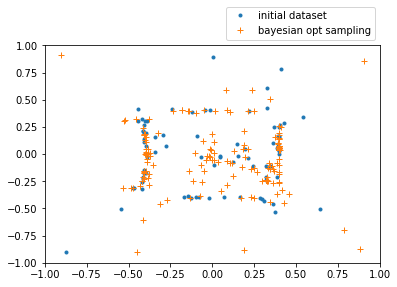

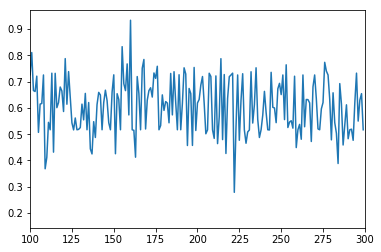

mfbo_17_3_14-6-8-8348_3574654936


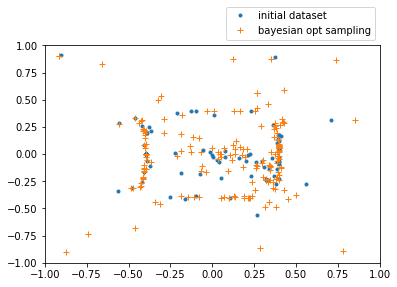

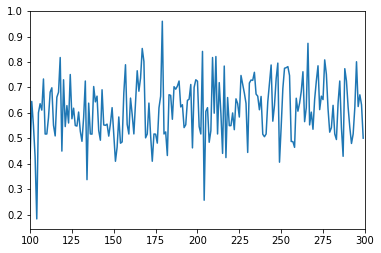

In [6]:
are_mfbo_escape_gpucb1_bounded = "/home/leni/are-logs/are_mfbo_escape_gpucb1_bounded//"
for folder in os.listdir(are_mfbo_escape_gpucb1_bounded) :
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo_escape_gpucb1_bounded + folder + "/bo_data.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:100],y[:100],'.',label="initial dataset")
    plt.plot(x[100:],y[100:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([100,300])
    plt.plot(r)
    plt.show()

mfbo_18_3_10-53-38-9001_849604765


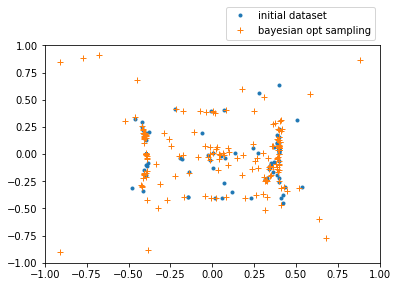

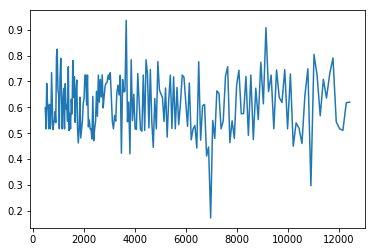

mfbo_18_3_10-53-51-1140_1627537308


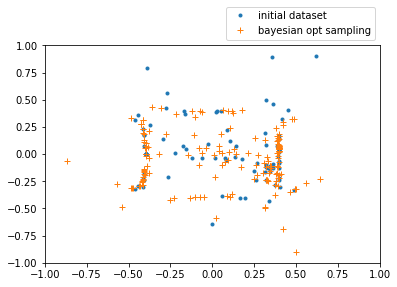

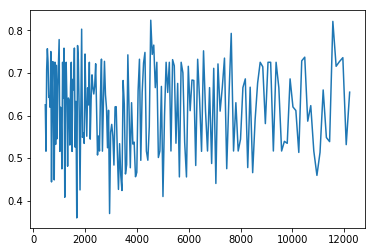

mfbo_18_3_10-53-41-1982_2798516899


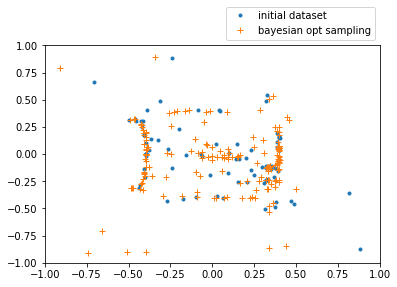

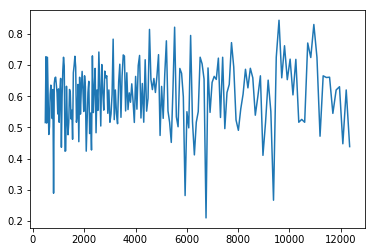

mfbo_18_3_10-53-33-3831_3932163567


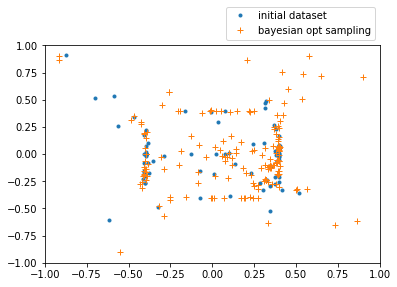

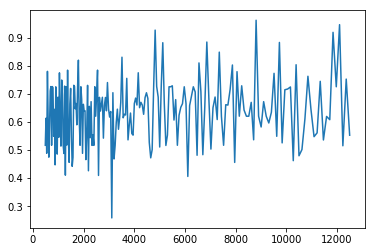

mfbo_18_3_10-53-33-3952_2726406767


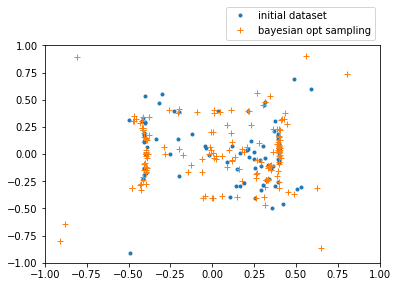

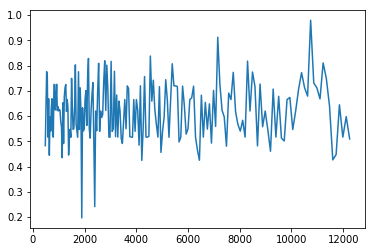

In [16]:
are_mfbo_escape_gpucb001 = "/home/leni/are-logs/are_mfbo_escape_gpucb001/"
for folder in os.listdir(are_mfbo_escape_gpucb001) :
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo_escape_gpucb001 + folder + "/bo_data.csv")
    evalnb, eval_time = load_eval_time(are_mfbo_escape_gpucb001 + folder + "/eval_durations.csv")
    eval_times = [eval_time[0]]
    for et in eval_time :
        eval_times.append(et + eval_times[-1])
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:100],y[:100],'.',label="initial dataset")
    plt.plot(x[100:],y[100:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y))
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    plt.plot(eval_times[2:],r[100:])
    plt.show()

mfbo_19_3_14-55-35-5184_2989112643


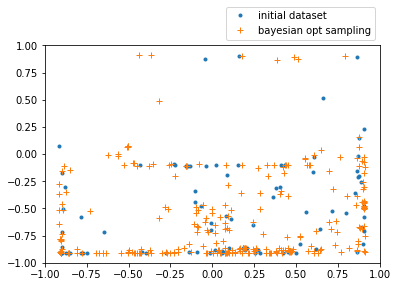

300 301


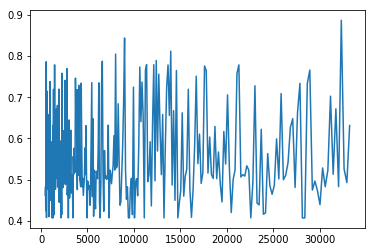

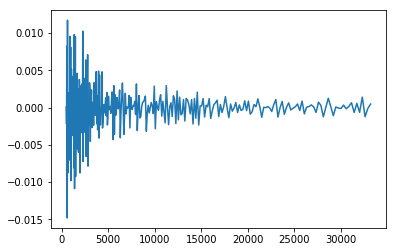

mfbo_19_3_11-40-55-5445_3383143378


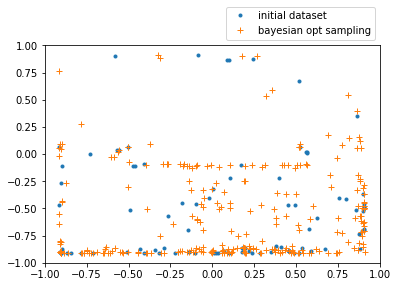

300 301


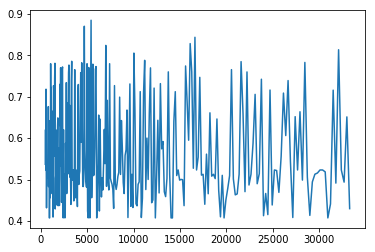

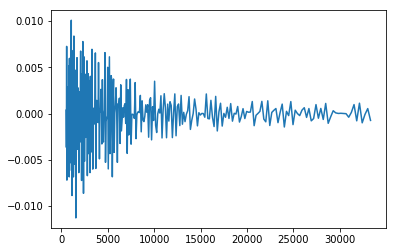

mfbo_19_3_11-40-57-7239_2548440198


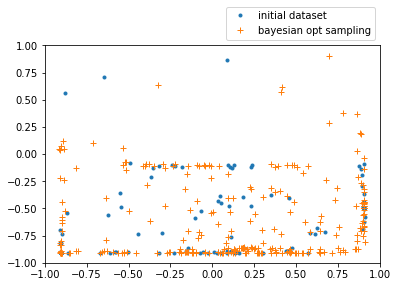

300 301


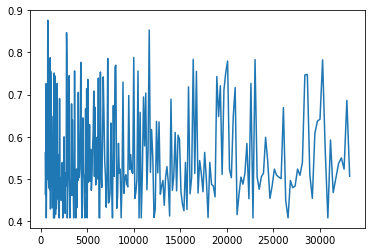

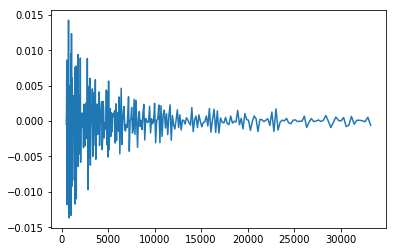

mfbo_19_3_11-40-47-7282_1565052126


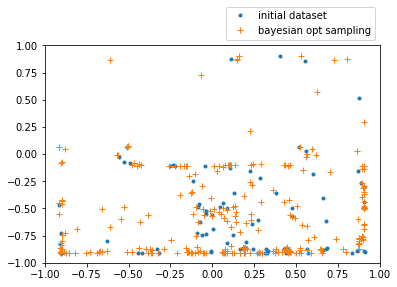

300 301


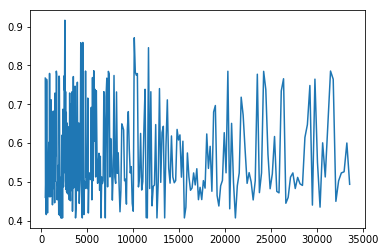

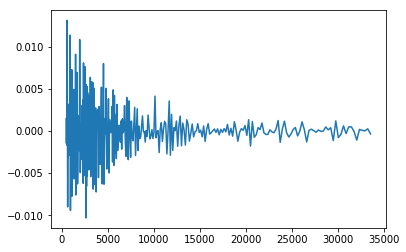

mfbo_19_3_11-41-3-3387_1500746722


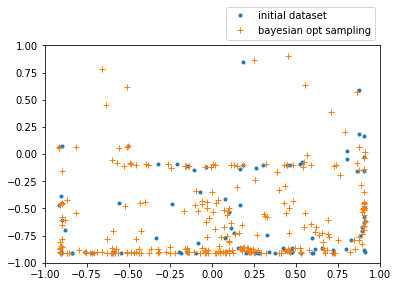

300 301


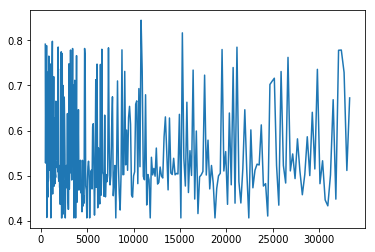

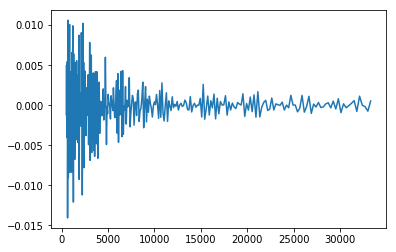

In [46]:
are_mfbo_middle_gpucb01 = "/home/leni/are-logs/are_mfbo_middle_gpucb01/"
for folder in os.listdir(are_mfbo_middle_gpucb01) :
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo_middle_gpucb01 + folder + "/bo_data.csv")
    evalnb, eval_time = load_eval_time(are_mfbo_middle_gpucb01 + folder + "/eval_durations.csv")
    eval_times = [eval_time[0]]
    for et in eval_time :
        eval_times.append(et + eval_times[-1])
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
   
    plt.plot(x[:100],y[:100],'.',label="initial dataset")
    plt.plot(x[100:],y[100:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y),[0,0.5])
    r = r[100:]
    print(len(r),len(eval_time))
    gain = [(r[i] - r[i-1])/eval_time[i-1] for i in range(1,len(r))]

    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    #ax.set_xscale('log')
    plt.plot(eval_times[2:],r,label="reward")
    fig, ax = plt.subplots()
    #ax.set_xscale('log')
    plt.plot(eval_times[3:],gain,label="time efficiency")
    plt.show()

mfbo_20_3_14-38-10-600_4141576712


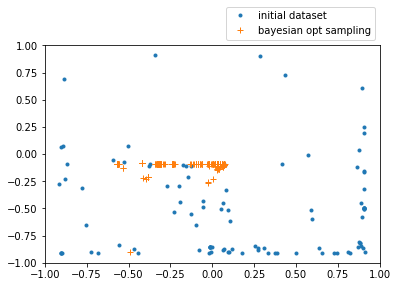

239 239


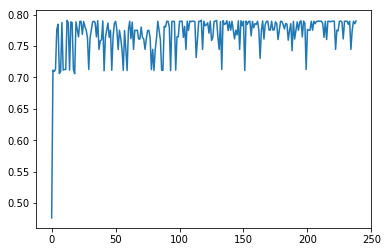

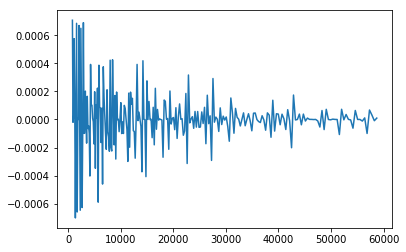

mfbo_20_3_14-38-44-4148_2776892779


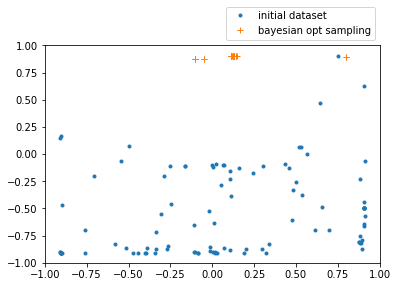

239 239


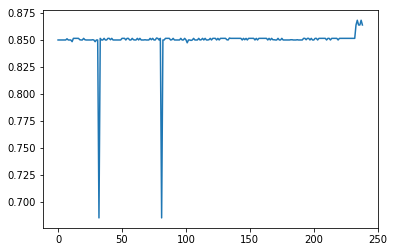

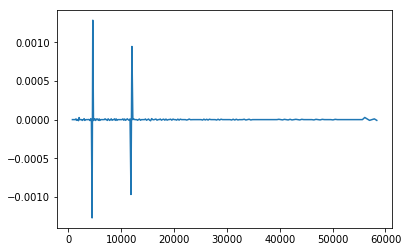

mfbo_20_3_14-40-43-3132_3845941143


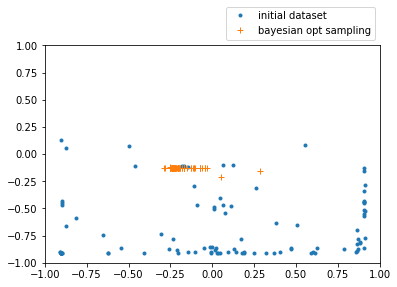

235 235


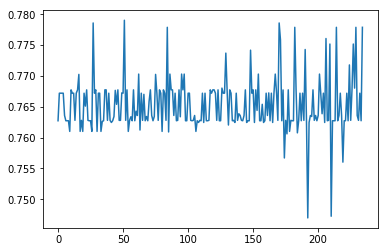

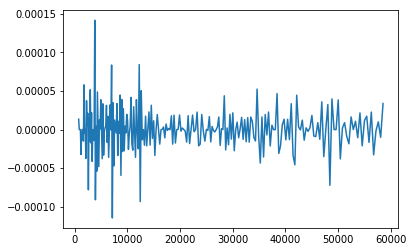

mfbo_20_3_14-38-21-1927_1590175196


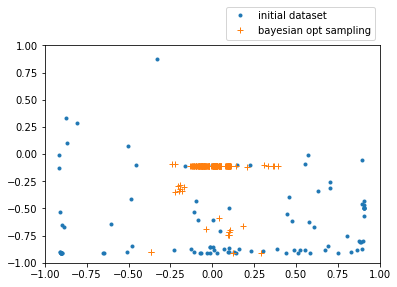

240 240


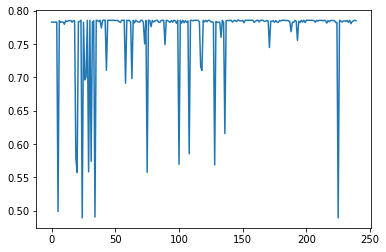

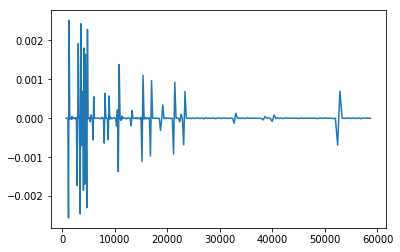

In [75]:
are_mfbo_middle_gpucb01 = "/home/leni/are-logs/are_mfbo_middle_gpucb01_unbounded/"
for folder in os.listdir(are_mfbo_middle_gpucb01) :
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    
    x, y = load_final_pos(are_mfbo_middle_gpucb01 + folder + "/bo_data.csv")
    evalnb, eval_time = load_eval_time(are_mfbo_middle_gpucb01 + folder + "/eval_durations.csv")
    eval_times = [eval_time[0]]
    for et in eval_time :
        eval_times.append(et + eval_times[-1])
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
   
    plt.plot(x[:100],y[:100],'.',label="initial dataset")
    plt.plot(x[100:],y[100:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y),[0,0.5])
    r = r[100:]
    print(len(r),len(eval_time))
    gain = [(r[i] - r[i-1])/eval_time[i-1] for i in range(1,len(r))]

    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    #ax.set_xscale('log')
    plt.plot(r,label="reward")
    fig, ax = plt.subplots()
    #ax.set_xscale('log')
    plt.plot(eval_times[2:],gain,label="time efficiency")
    plt.show()

mfbo_14_4_17-6-24-4123_4288497578


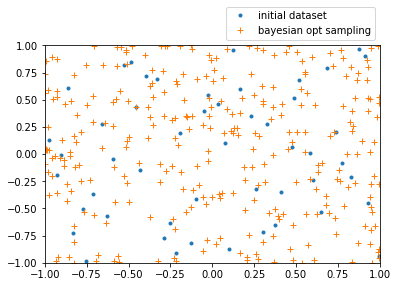

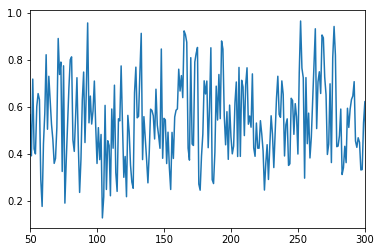

mfbo_14_4_17-11-59-9981_1225441373


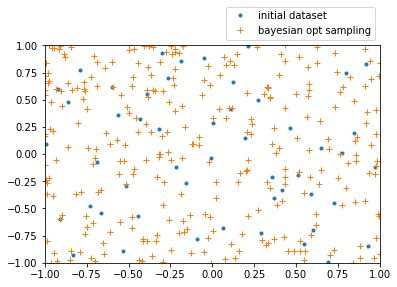

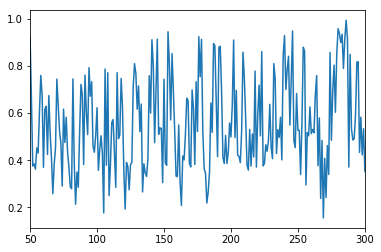

mfbo_14_4_16-30-56-6308_2804217651


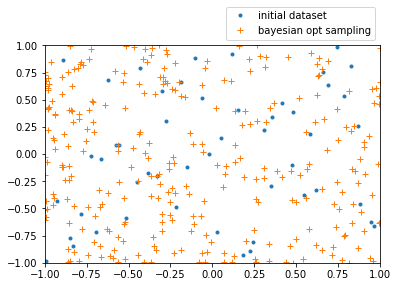

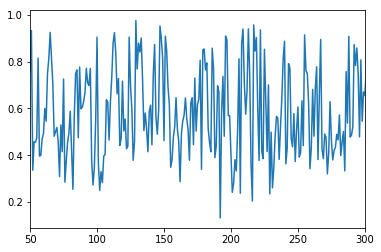

mfbo_14_4_16-0-55-5210_924356264


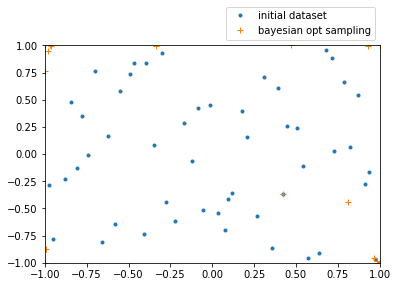

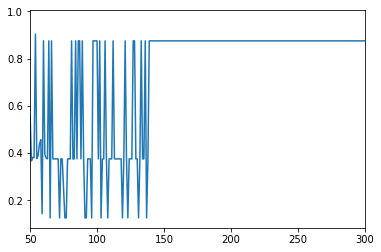

mfbo_14_4_15-56-12-2175_3941455264


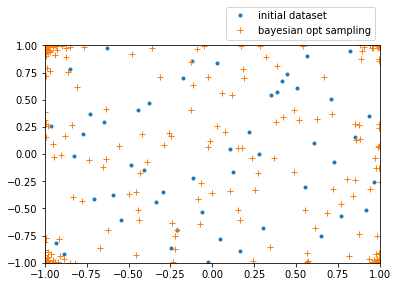

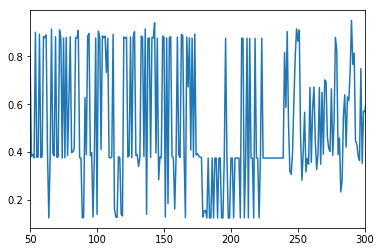

mfbo_14_4_15-23-25-5015_3208144512


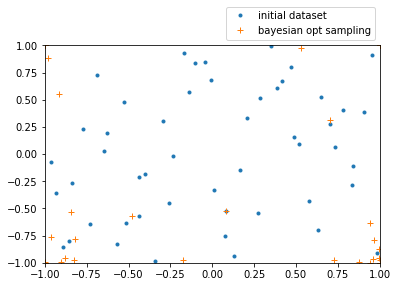

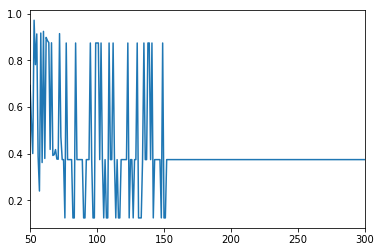

mfbo_14_4_16-27-33-3284_3290023084


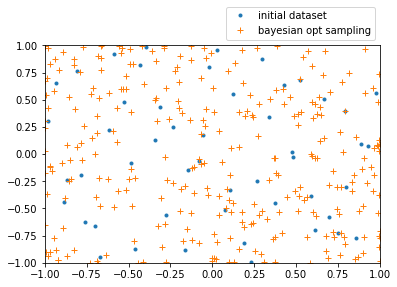

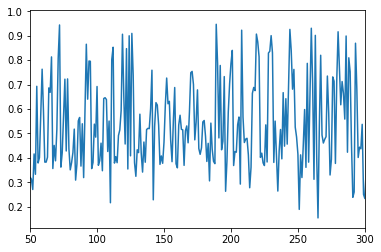

mfbo_14_4_16-23-29-9807_4048271333


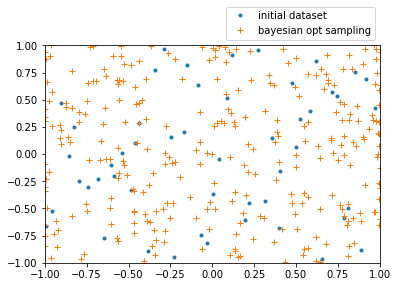

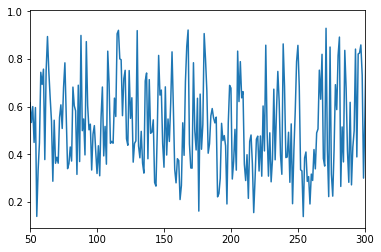

mfbo_14_4_17-11-53-3084_2632510227


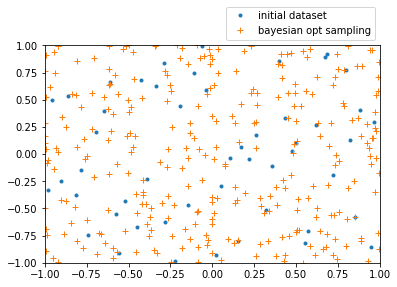

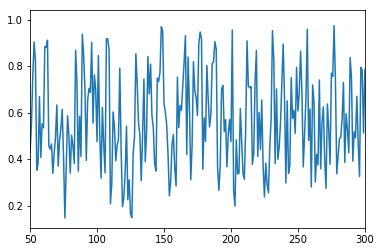

mfbo_14_4_16-44-41-1020_1821265863


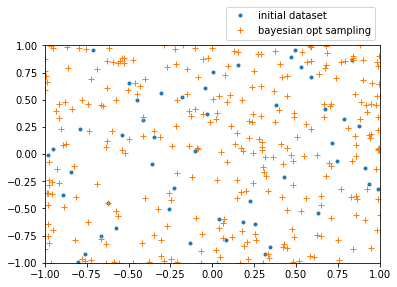

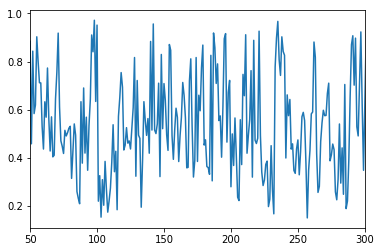

In [16]:
are_mfbo_easy_traj = "/home/leni/are-logs/are_mfbo_easy_traj/"
for folder in os.listdir(are_mfbo_easy_traj) :
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    
    x, y = load_obs(are_mfbo_easy_traj + folder + "/bo_data.csv")
    fig2, ax2 = plt.subplots()
    ax2.set_ylim(-1.,1.)
    ax2.set_xlim(-1.,1.)
    plt.plot(x[:50],y[:50],'.',label="initial dataset")
    plt.plot(x[50:],y[50:],'+',label="bayesian opt sampling")
    plt.legend(loc=1,bbox_to_anchor=(1, 1.2))
    plt.show()
        
    r = rewards(zip(x,y),[-0.75,-0.75])
    fig, ax = plt.subplots()
    #    ax.set_ylim(-1.5,0)
    ax.set_xlim([50,300])
    plt.plot(r)
    plt.show()

mfbo_19_3_14-55-35-5184_2989112643
mfbo_19_3_11-40-55-5445_3383143378
mfbo_19_3_11-40-57-7239_2548440198
mfbo_19_3_11-40-47-7282_1565052126
mfbo_19_3_11-41-3-3387_1500746722


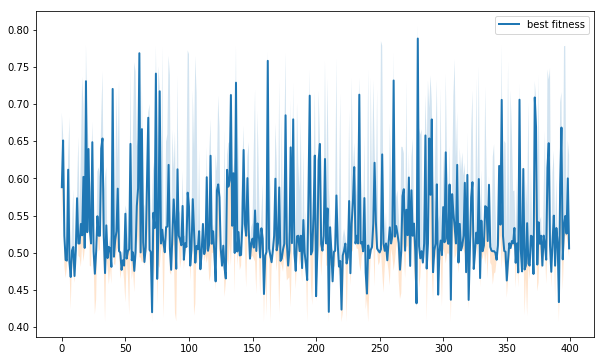

In [50]:
are_mfbo_middle_gpucb01 = "/home/leni/are-logs/are_mfbo_middle_gpucb01/"
med, p3, p1 = load_fit_from_folder(are_mfbo_middle_gpucb01,[0,0.5])
x = range(0,len(med))
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(x,med,linewidth=2,label="best fitness")
ax1.fill_between(x,p3,med,alpha=.2)
ax1.fill_between(x,p1,med,alpha=.2)
plt.legend()
plt.show()

mfbo_19_3_14-55-35-5184_2989112643
301 300
mfbo_19_3_11-40-55-5445_3383143378
301 300
mfbo_19_3_11-40-57-7239_2548440198
301 300
mfbo_19_3_11-40-47-7282_1565052126
301 300
mfbo_19_3_11-41-3-3387_1500746722
301 300


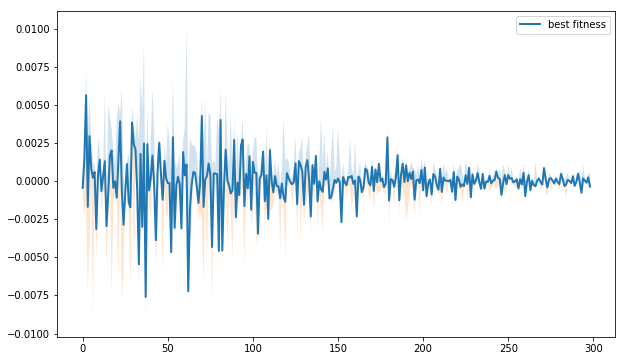

In [7]:
are_mfbo_middle_gpucb01 = "/home/leni/are-logs/are_mfbo_middle_gpucb01/"
med, p3, p1 = load_te_from_folder(are_mfbo_middle_gpucb01,[0,0.5])
x = range(0,len(med))
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(x,med,linewidth=2,label="best fitness")
ax1.fill_between(x,p3,med,alpha=.2)
ax1.fill_between(x,p1,med,alpha=.2)
plt.legend()
plt.show()

mfbo_26_3_10-19-21-1291_1255144380
mfbo_23_3_9-28-22-2957_3325146452
mfbo_23_3_9-28-43-3615_3408541584
mfbo_26_3_10-19-57-7149_2126346032
mfbo_26_3_10-19-53-3165_4228808393
mfbo_26_3_10-19-35-5633_2143847737
mfbo_23_3_9-28-17-7765_2056790073
mfbo_23_3_9-28-28-8786_1013648064
mfbo_23_3_9-28-13-3559_941441005
mfbo_26_3_10-19-49-9095_2215744135


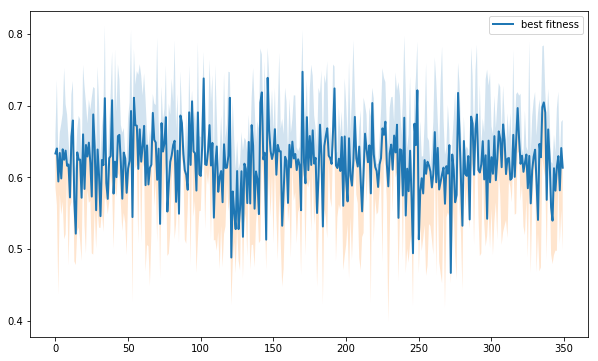

In [14]:
are_mfbo_escape = "/home/leni/are-logs/are_mfbo_escape/"
med, p3, p1 = load_fit_from_folder(are_mfbo_escape,[0.75,0.75])
x = range(0,len(med))
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(x,med,linewidth=2,label="best fitness")
ax1.fill_between(x,p3,med,alpha=.2)
ax1.fill_between(x,p1,med,alpha=.2)
plt.legend()
plt.show()

mfbo_26_3_10-19-21-1291_1255144380
301 300
mfbo_23_3_9-28-22-2957_3325146452
301 300
mfbo_23_3_9-28-43-3615_3408541584
301 300
mfbo_26_3_10-19-57-7149_2126346032
301 300
mfbo_26_3_10-19-53-3165_4228808393
301 300
mfbo_26_3_10-19-35-5633_2143847737
301 300
mfbo_23_3_9-28-17-7765_2056790073
301 300
mfbo_23_3_9-28-28-8786_1013648064
301 300
mfbo_23_3_9-28-13-3559_941441005
301 300
mfbo_26_3_10-19-49-9095_2215744135
301 300


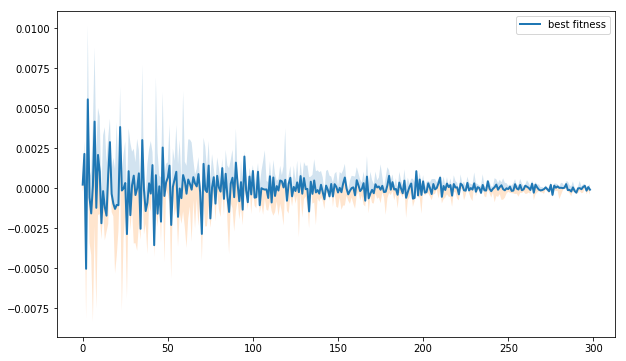

In [15]:
are_mfbo_escape = "/home/leni/are-logs/are_mfbo_escape/"
med, p3, p1 = load_te_from_folder(are_mfbo_escape,[0.75,0.75])
x = range(0,len(med))
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(x,med,linewidth=2,label="best fitness")
ax1.fill_between(x,p3,med,alpha=.2)
ax1.fill_between(x,p1,med,alpha=.2)
plt.legend()
plt.show()

In [70]:
are_mfbo_middle_gpucb01 = "/home/leni/are-logs/are_mfbo_middle_gpucb01/"
for folder in os.listdir(are_mfbo_middle_gpucb01) :
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    samples = load_samples(are_mfbo_middle_gpucb01 + folder + "/bo_data.csv")
    print(len(samples))
    print(np.std(samples[100:]))
    print(np.max(samples[100:]))
    print(np.min(samples[100:]))

mfbo_19_3_14-55-35-5184_2989112643
400
0.6275321503808552
1.0
-1.0
mfbo_19_3_11-40-55-5445_3383143378
400
0.6281541754822634
1.0
-1.0
mfbo_19_3_11-40-57-7239_2548440198
400
0.6250206329112656
1.0
-1.0
mfbo_19_3_11-40-47-7282_1565052126
400
0.6255876729753455
1.0
-1.0
mfbo_19_3_11-41-3-3387_1500746722
400
0.626027550350922
1.0
-1.0


In [76]:
are_mfbo_middle_gpucb01 = "/home/leni/are-logs/are_mfbo_middle_gpucb01_unbounded/"
for folder in os.listdir(are_mfbo_middle_gpucb01) :
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    samples = load_samples(are_mfbo_middle_gpucb01 + folder + "/bo_data.csv")
    print(len(samples))
    print(np.std(samples[100:]))
    print(np.max(samples[100:]))
    print(np.min(samples[100:]))

mfbo_20_3_14-38-10-600_4141576712
339
152.66447168465348
434.552
-579.408
mfbo_20_3_14-38-44-4148_2776892779
339
238.70127489664833
757.327
-936.662
mfbo_20_3_14-40-43-3132_3845941143
335
143.26835344791328
334.299
-341.056
mfbo_20_3_14-38-21-1927_1590175196
340
120.11219284753493
389.766
-355.647


mfbo_26_3_10-24-10-762_673171630


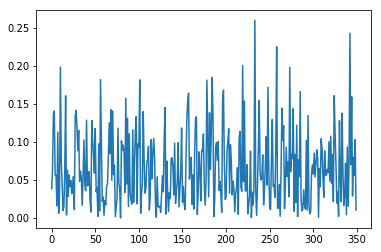

mfbo_26_3_10-24-36-6227_3254818495


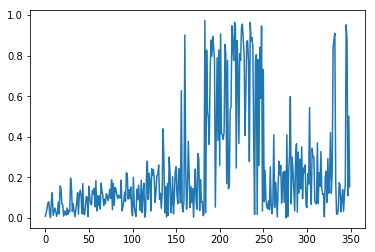

mfbo_26_3_10-24-18-8783_925306376


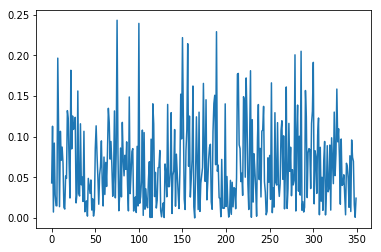

mfbo_26_3_10-24-13-3700_241115558


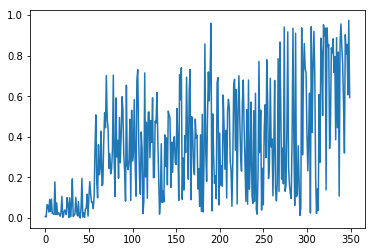

mfbo_26_3_10-24-13-3976_1862838568


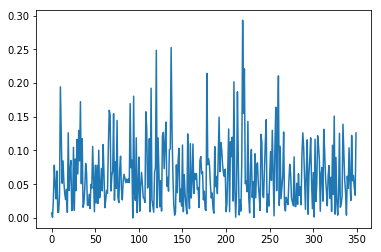

mfbo_26_3_10-24-15-5271_2479888488


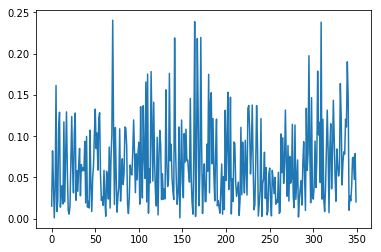

mfbo_26_3_10-24-40-108_3344608062


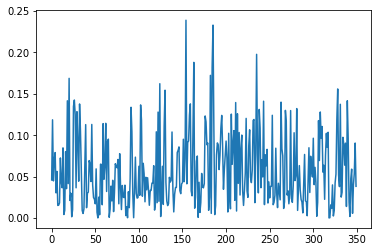

mfbo_26_3_10-24-20-94_3927025347


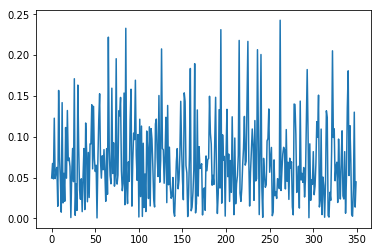

mfbo_26_3_10-23-55-5400_3147801958


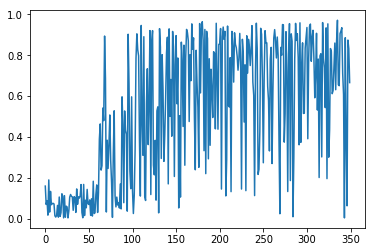

mfbo_26_3_10-24-22-2593_3494545049


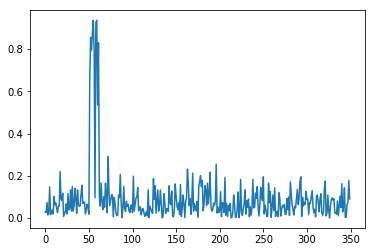

In [8]:
are_mfbo_easy = "/home/leni/are-logs/are_mfbo_easy/"

for folder in os.listdir(are_mfbo_easy) :
    sample_list = []
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    samples = load_samples(are_mfbo_easy + folder + "/bo_data.csv")
    for s in samples :
        sample_list.append(abs(np.median(s)))
    plt.plot(sample_list)
    plt.show()




mfbo_26_3_10-19-21-1291_1255144380


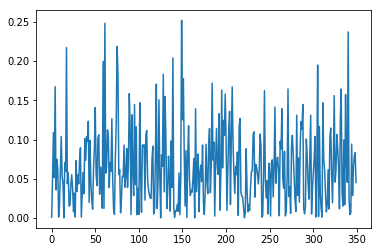

mfbo_23_3_9-28-22-2957_3325146452


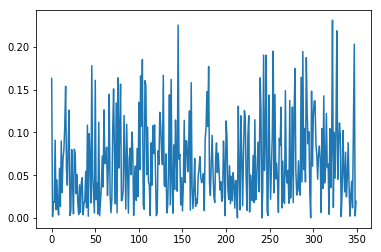

mfbo_23_3_9-28-43-3615_3408541584


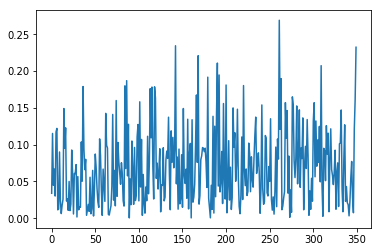

mfbo_26_3_10-19-57-7149_2126346032


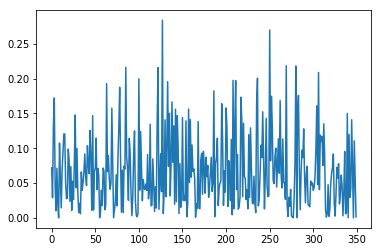

mfbo_26_3_10-19-53-3165_4228808393


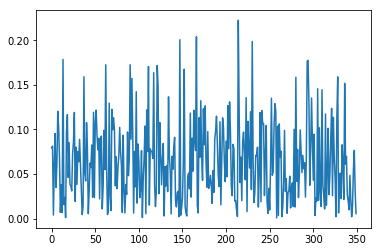

mfbo_26_3_10-19-35-5633_2143847737


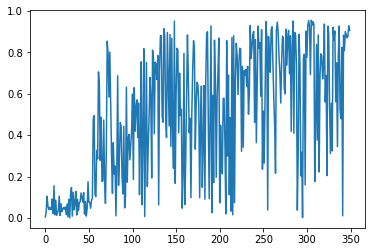

mfbo_23_3_9-28-17-7765_2056790073


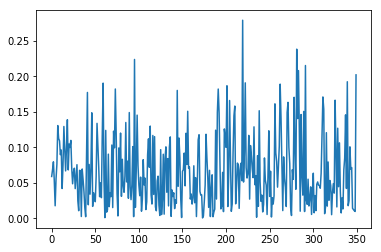

mfbo_23_3_9-28-28-8786_1013648064


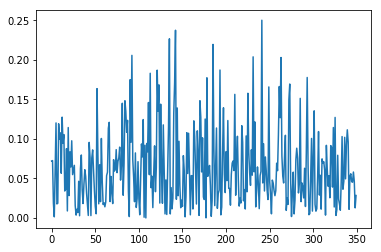

mfbo_23_3_9-28-13-3559_941441005


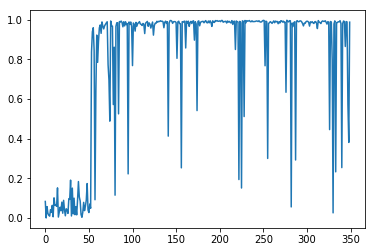

mfbo_26_3_10-19-49-9095_2215744135


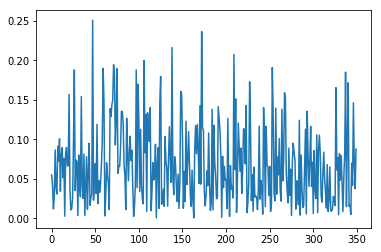

In [10]:
are_mfbo_escape = "/home/leni/are-logs/are_mfbo_escape/"

for folder in os.listdir(are_mfbo_escape) :
    sample_list = []
    if(folder.split("_")[0] != "mfbo") :
        continue
    print(folder)
    samples = load_samples(are_mfbo_escape + folder + "/bo_data.csv")
    for s in samples :
        sample_list.append(abs(np.median(s)))
    plt.plot(sample_list)
    plt.show()